# Toy Problem 3

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

## Prep

In [2]:
import pandas as pd
import seaborn as sns

def plot_data_1dim(x, y, x_agg_1dim, y_agg_1dim, x_test_1dim, y_pred=None, aleatoric_uncertainty = None, epistemic_uncertainty = None, total_uncertainty = None, title=None):
    
    if y_pred is not None:

        df = pd.DataFrame({'mf0': x[:,0], 'mf1': x[:,1], 'y': y})

        fig, ax = plt.subplots(3,1, figsize=(10, 5.5), dpi=300, sharex=True, gridspec_kw={'height_ratios': [1.5, 1, 1]})
        fig.suptitle(title, fontsize=12)

        #subspaces
        ax[0].fill_betweenx([0,1], 0, 10, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1], 10, 20, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1], 20, 30, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1], 30, 40, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1], 40, 50, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1], 50, 60, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1], 60, 70, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1], 70, 80, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1], 80, 90, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1], 90, 100, color='grey', alpha=0.2)

        #ground truth
        
        #mf2=0
        ax[0].plot(np.arange(10,21,1), [0.7]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

        ax[0].fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)
        
        #mf2=1
        ax[0].plot(np.arange(10,21,1), [0.9]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(20,31,1), [0.8]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(30,41,1), [0.85]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(40,51,1), [0.6]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(50,61,1), [0.75]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(60,71,1), [0.95]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(70,81,1), [0.9]*11, color='chartreuse', linewidth=1.5)
        ax[0].plot(np.arange(80,91,1), [0.85]*11, color='chartreuse', linewidth=1.5)

        ax[0].fill_between(np.arange(10,21,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(20,31,1), [0.8-1.96*0.03]*11, [0.8+1.96*0.03]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(30,41,1), [0.85-1.96*0.03]*11, [0.85+1.96*0.03]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(40,51,1), [0.6-1.96*0.08]*11, [0.6+1.96*0.08]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(50,61,1), [0.75-1.96*0.07]*11, [0.75+1.96*0.07]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(60,71,1), [0.95-1.96*0.01]*11, [0.95+1.96*0.01]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(70,81,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', alpha=0.2)
        ax[0].fill_between(np.arange(80,91,1), [0.85-1.96*0.02]*11, [0.85+1.96*0.02]*11, color='chartreuse', alpha=0.2)

        #labels for legend
        ax[0].plot([], [], color='blue', label='ground truth mf2=0', linewidth=1.5)
        ax[0].fill_between([],[], [], color='blue', alpha=0.2, label='95% PI - ground truth mf2=0')
        ax[0].plot([], [], color='chartreuse', label='ground truth mf2=1', linewidth=1.5)
        ax[0].fill_between([],[], [], color='chartreuse', alpha=0.2, label='95% PI - ground truth mf2=1')
        ax[0].scatter([],[], color='steelblue', label='observations mf2=0')
        ax[0].scatter([],[], color='lime', label='observations mf2=1')
        ax[0].fill_between([], [], [], color='steelblue', label='observed distribution mf2=0', linewidth=1.5)
        ax[0].fill_between([], [], [], color='lime', label='observed distribution mf2=1', linewidth=1.5)
        
        #observations
        sns.stripplot(x='mf0', y='y', hue='mf1', data=df, dodge=True, jitter=True, native_scale=True, alpha=0.3, ax=ax[0], palette={0.0: 'steelblue', 1.0: 'lime'}, legend=False)
        sns.boxplot(x='mf0', y='y', hue='mf1', data=df, native_scale=True, ax=ax[0], fliersize=0.1, linewidth=1.5, palette={0.0: 'steelblue', 1.0: 'lime'}, legend=False)
          

        #predictions
        ax[0].plot(x_test_1dim, y_pred, label='prediction', color='r', linewidth=1.5)
        ax[0].fill_between(x_test_1dim, y_pred + 1.96*np.sqrt(total_uncertainty), y_pred - 1.96*np.sqrt(total_uncertainty), alpha=0.2, color='red', label='95% PI - total uncertainty')
    
        ax[0].set_ylabel('acc', fontsize=12)
        ax[0].set_ylim([0,1])
        ax[0].yaxis.grid(True)

        #labels for legend
        ax[0].scatter([], [], color='black', label='observation aleatoric', linewidth=1.5, marker='s')
        ax[0].plot([], [], color='orange', label='prediction aleatoric', linewidth=1.5)
        ax[0].plot([], [], color='green', label='prediction epistemic', linewidth=1.5)

        #subspaces
        ax[1].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

        #observations
        ax[1].bar(x_agg_1dim, y_agg_1dim[:,1], color='black', label='observation')
        
        ax[1].plot(x_test_1dim, aleatoric_uncertainty, label='prediction', color='orange', linewidth=1.5)
       
        ax[1].set_ylabel('var', fontsize=12)
        ax[1].set_ylim([0,0.018])
        ax[1].yaxis.grid(True)

        #subspaces
        ax[2].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

        ax[2].plot(x_test_1dim, epistemic_uncertainty, label='prediction', color='green', linewidth=1.5)
        
        ax[2].set_ylabel('var', fontsize=12)
        ax[2].set_ylim([0,0.018])
        ax[2].yaxis.grid(True)
        
        ax[2].set_xlabel('meta-feature 1', fontsize=12)
        ax[2].set_xlim([np.min(x_test_1dim), np.max(x_test_1dim)])

        ax[2].set_xticks(np.arange(np.min(x_test_1dim),np.max(x_test_1dim)+1,10))

        ax[0].set_title('total uncertainty', fontsize=12, loc='left')
        ax[1].set_title('aleatoric uncertainty', fontsize=12, loc='left')
        ax[2].set_title('epistemic uncertainty', fontsize=12, loc='left')

        handles, labels = ax[0].get_legend_handles_labels()  
        fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.18))  

        #plt.savefig(f"toy3_1dim_{title}.pdf", format="pdf")

        plt.tight_layout()

    else:

        df = pd.DataFrame({'mf0': x[:,0], 'mf1': x[:,1], 'y': y})
        
        fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
        fig.suptitle(title, fontsize=12)

        #subspaces
        ax.fill_betweenx([0,1], 0, 10, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 10, 20, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 20, 30, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 30, 40, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 40, 50, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 50, 60, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 60, 70, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 70, 80, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 80, 90, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 90, 100, color='grey', alpha=0.2)

        #ground truth
        
        #mf2=0
        ax.plot(np.arange(10,21,1), [0.7]*11, color='blue', label='ground truth mf2=0',linewidth=1.5)
        ax.plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

        ax.fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', label='ground truth mf2=0', alpha=0.2)
        ax.fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)
        
        #mf2=1
        ax.plot(np.arange(10,21,1), [0.9]*11, color='chartreuse', label='ground truth mf2=1',linewidth=1.5)
        ax.plot(np.arange(20,31,1), [0.8]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(30,41,1), [0.85]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(40,51,1), [0.6]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(50,61,1), [0.75]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(60,71,1), [0.95]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(70,81,1), [0.9]*11, color='chartreuse', linewidth=1.5)
        ax.plot(np.arange(80,91,1), [0.85]*11, color='chartreuse', linewidth=1.5)

        ax.fill_between(np.arange(10,21,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', label='ground truth mf2=1',alpha=0.2)
        ax.fill_between(np.arange(20,31,1), [0.8-1.96*0.03]*11, [0.8+1.96*0.03]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(30,41,1), [0.85-1.96*0.03]*11, [0.85+1.96*0.03]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(50,61,1), [0.75-1.96*0.07]*11, [0.75+1.96*0.07]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(60,71,1), [0.95-1.96*0.01]*11, [0.95+1.96*0.01]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(70,81,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', alpha=0.2)
        ax.fill_between(np.arange(80,91,1), [0.85-1.96*0.02]*11, [0.85+1.96*0.02]*11, color='chartreuse', alpha=0.2)

        sns.stripplot(x='mf0', y='y', hue='mf1', data=df, dodge=True, jitter=True, native_scale=True, alpha=0.3, ax=ax, palette={0.0: 'steelblue', 1.0: 'lime'}, legend=False)
        sns.boxplot(x='mf0', y='y', hue='mf1', data=df, native_scale=True, ax=ax, fliersize=0.1, linewidth=1.5, palette={0.0: 'steelblue', 1.0: 'lime'}, legend=False)
    
        ax.scatter([],[], color='steelblue', label='observations mf2=0')
        ax.scatter([],[], color='lime', label='observations mf2=1')
        ax.fill_between([], [], [], color='steelblue', label='observed distribution mf2=0', linewidth=1.5)
        ax.fill_between([], [], [], color='lime', label='observed distribution mf2=1', linewidth=1.5)
        
        ax.set_xlabel('meta-feature 1', fontsize=12)
        ax.set_ylabel('acc', fontsize=12)

        ax.set_xlim([np.min(x_test_1dim), np.max(x_test_1dim)])
        ax.set_ylim([0,1])

        ax.set_xticks(np.arange(np.min(x_test_1dim),np.max(x_test_1dim)+1,10))
        ax.yaxis.grid(True)
            
        ax.legend(loc='lower right')

        #plt.savefig(f"toy3_general_setup.pdf", format="pdf", bbox_inches="tight")

        
    plt.show()

In [ ]:
def plot_data_2dim(x, y, x_agg, y_agg, x_test_1dim, y_pred, aleatoric_uncertainty, epistemic_uncertainty, total_uncertainty, title=None): 
    
    df = pd.DataFrame({'mf1': x[:,0], 'mf2': x[:,1], 'y': y})

    fig, ax = plt.subplots(3,2,figsize=(10, 5.5), dpi=300, sharex=True, gridspec_kw={'height_ratios': [1.5, 1, 1]})
    fig.suptitle(title, fontsize=12)

    #subspaces
    ax[0,0].fill_betweenx([0,1], 0, 10, color='grey', alpha=0.1)
    ax[0,0].fill_betweenx([0,1], 10, 20, color='grey', alpha=0.2)
    ax[0,0].fill_betweenx([0,1], 20, 30, color='grey', alpha=0.1)
    ax[0,0].fill_betweenx([0,1], 30, 40, color='grey', alpha=0.2)
    ax[0,0].fill_betweenx([0,1], 40, 50, color='grey', alpha=0.1)
    ax[0,0].fill_betweenx([0,1], 50, 60, color='grey', alpha=0.2)
    ax[0,0].fill_betweenx([0,1], 60, 70, color='grey', alpha=0.1)
    ax[0,0].fill_betweenx([0,1], 70, 80, color='grey', alpha=0.2)
    ax[0,0].fill_betweenx([0,1], 80, 90, color='grey', alpha=0.1)
    ax[0,0].fill_betweenx([0,1], 90, 100, color='grey', alpha=0.2)

    ax[0,1].fill_betweenx([0,1], 0, 10, color='grey', alpha=0.1)
    ax[0,1].fill_betweenx([0,1], 10, 20, color='grey', alpha=0.2)
    ax[0,1].fill_betweenx([0,1], 20, 30, color='grey', alpha=0.1)
    ax[0,1].fill_betweenx([0,1], 30, 40, color='grey', alpha=0.2)
    ax[0,1].fill_betweenx([0,1], 40, 50, color='grey', alpha=0.1)
    ax[0,1].fill_betweenx([0,1], 50, 60, color='grey', alpha=0.2)
    ax[0,1].fill_betweenx([0,1], 60, 70, color='grey', alpha=0.1)
    ax[0,1].fill_betweenx([0,1], 70, 80, color='grey', alpha=0.2)
    ax[0,1].fill_betweenx([0,1], 80, 90, color='grey', alpha=0.1)
    ax[0,1].fill_betweenx([0,1], 90, 100, color='grey', alpha=0.2)

     #ground truth
        
    #mf2=0
    ax[0,0].plot(np.arange(10,21,1), [0.7]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
    ax[0,0].plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

    ax[0,0].fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
    ax[0,0].fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)
    
    #mf2=1
    ax[0,1].plot(np.arange(10,21,1), [0.9]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(20,31,1), [0.8]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(30,41,1), [0.85]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(40,51,1), [0.6]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(50,61,1), [0.75]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(60,71,1), [0.95]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(70,81,1), [0.9]*11, color='chartreuse', linewidth=1.5)
    ax[0,1].plot(np.arange(80,91,1), [0.85]*11, color='chartreuse', linewidth=1.5)

    ax[0,1].fill_between(np.arange(10,21,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(20,31,1), [0.8-1.96*0.03]*11, [0.8+1.96*0.03]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(30,41,1), [0.85-1.96*0.03]*11, [0.85+1.96*0.03]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(50,61,1), [0.75-1.96*0.07]*11, [0.75+1.96*0.07]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(60,71,1), [0.95-1.96*0.01]*11, [0.95+1.96*0.01]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(70,81,1), [0.9-1.96*0.02]*11, [0.9+1.96*0.02]*11, color='chartreuse', alpha=0.2)
    ax[0,1].fill_between(np.arange(80,91,1), [0.85-1.96*0.02]*11, [0.85+1.96*0.02]*11, color='chartreuse', alpha=0.2)


    #observations
    sns.boxplot(x='mf1', y='y', data=df[df['mf2']==0], fliersize=0.1,native_scale=True, ax=ax[0,0], linewidth=1.5, color='steelblue', legend=False)
    sns.stripplot(x='mf1', y='y', data=df[df['mf2']==0], jitter=True, alpha=0.5, size=2, native_scale=True, ax=ax[0,0], linewidth=1.5, color='steelblue', legend=False)

    sns.boxplot(x='mf1', y='y', data=df[df['mf2']==1], fliersize=0.1,native_scale=True, ax=ax[0,1], linewidth=1.5, color='lime', legend=False)
    sns.stripplot(x='mf1', y='y', data=df[df['mf2']==1], jitter=True, alpha=0.5, size=2, native_scale=True, ax=ax[0,1], linewidth=1.5, color='lime', legend=False)
    
    #labels for legend
    ax[0,0].plot([], [], color='blue', label='ground truth mf2=0', linewidth=1.5)
    ax[0,0].fill_between([],[], [], color='blue', alpha=0.2, label='95% PI - ground truth mf2=0')
    ax[0,0].plot([], [], color='chartreuse', label='ground truth mf2=1', linewidth=1.5)
    ax[0,0].fill_between([],[], [], color='chartreuse', alpha=0.2, label='95% PI - ground truth mf2=1')
    ax[0,0].scatter([],[], color='steelblue', label='observations mf2=0')
    ax[0,0].scatter([],[], color='lime', label='observations mf2=1')
    ax[0,0].fill_between([], [], [], color='steelblue', label='observed distribution mf2=0', linewidth=1.5)
    ax[0,0].fill_between([], [], [], color='lime', label='observed distribution mf2=1', linewidth=1.5)
    
    #predictions
    ax[0,0].plot(x_test_1dim, y_pred[:x_test_1dim.shape[0]], label='prediction', color='r', linewidth=1.5)
    ax[0,0].fill_between(x_test_1dim, y_pred[:x_test_1dim.shape[0]] + 1.96*np.sqrt(total_uncertainty[:x_test_1dim.shape[0]]), y_pred[:x_test_1dim.shape[0]] - 1.96*np.sqrt(total_uncertainty[:x_test_1dim.shape[0]]), alpha=0.3, color='red', label='95% PI - total uncertainty')   
    
    ax[0,1].plot(x_test_1dim, y_pred[x_test_1dim.shape[0]:], label='prediction', color='r', linewidth=1.5)
    ax[0,1].fill_between(x_test_1dim, y_pred[x_test_1dim.shape[0]:] + 1.96*np.sqrt(total_uncertainty[x_test_1dim.shape[0]:]), y_pred[x_test_1dim.shape[0]:] - 1.96*np.sqrt(total_uncertainty[x_test_1dim.shape[0]:]), alpha=0.3, color='red', label='95% PI - total uncertainty')   
    
    ax[0,0].set_ylabel('acc', fontsize=12)
    ax[0,1].set(ylabel=None)
    ax[0,0].set_ylim([0,1])
    ax[0,1].set_ylim([0,1])
    ax[0,0].yaxis.grid(True)
    ax[0,1].yaxis.grid(True)
    ax[0,1].tick_params('y', left=False, labelleft=False)

    #labels for legend
    ax[0,0].plot([],[], color='darkcyan', label='ground truth aleatoric',linewidth=1.5)
    ax[0,0].scatter([], [], color='black', label='observation aleatoric', marker='s')
    ax[0,0].plot([], [], color='orange', label='prediction aleatoric', linewidth=1.5)
    ax[0,0].plot([], [], color='green', label='prediction epistemic', linewidth=1.5)


    #subspaces

    for i in range(2):
        ax[1,i].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[1,i].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[1,i].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[1,i].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[1,i].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[1,i].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[1,i].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[1,i].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[1,i].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[1,i].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

    ax[1,0].plot(np.arange(10,21,1), [0.0001]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(20,31,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(30,41,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(40,51,1), [0.0064]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(50,61,1), [0.0036]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(60,71,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(70,81,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
    ax[1,0].plot(np.arange(80,91,1), [0.0004]*11, color='darkcyan', linewidth=1.5)

    ax[1,1].plot(np.arange(10,21,1), [0.0004]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(20,31,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(30,41,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(40,51,1), [0.0064]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(50,61,1), [0.0049]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(60,71,1), [0.0001]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(70,81,1), [0.0004]*11, color='darkcyan', linewidth=1.5)
    ax[1,1].plot(np.arange(80,91,1), [0.0004]*11, color='darkcyan', linewidth=1.5)

    #observations
    ax[1,0].bar(x_agg, y_agg[:x_agg.shape[0],1], color='black', label='observation')
    ax[1,1].bar(x_agg, y_agg[x_agg.shape[0]:,1], color='black', label='observation')

    #predictions
    ax[1,0].plot(x_test_1dim, aleatoric_uncertainty[:x_test_1dim.shape[0]], label='prediction', color='orange')
    ax[1,1].plot(x_test_1dim, aleatoric_uncertainty[x_test_1dim.shape[0]:], label='prediction', color='orange')
    

    ax[1,0].set_ylabel('var', fontsize=12)
    ax[1,1].set(ylabel=None)
    ax[1,0].set_ylim([0,0.018])
    ax[1,1].set_ylim([0,0.018])
    ax[1,0].yaxis.grid(True)
    ax[1,1].yaxis.grid(True)
    ax[1,1].tick_params('y', left=False, labelleft=False)

    #subspaces

    for i in range(2):
        ax[2,i].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[2,i].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[2,i].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[2,i].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[2,i].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[2,i].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[2,i].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[2,i].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[2,i].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[2,i].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

    ax[2,0].plot(x_test_1dim, epistemic_uncertainty[:x_test_1dim.shape[0]], label='prediction', color='g')
    ax[2,1].plot(x_test_1dim, epistemic_uncertainty[x_test_1dim.shape[0]:], label='prediction', color='g')
    
    ax[2,0].set_ylabel('var')
    ax[2,1].set(ylabel=None)
    ax[2,0].set_ylim([0,0.018])
    ax[2,1].set_ylim([0,0.018])
    ax[2,0].yaxis.grid(True)
    ax[2,1].yaxis.grid(True)
    ax[2,1].tick_params('y', left=False, labelleft=False)

    
    ax[2,0].set_xlabel('meta-feature 1', fontsize=12)
    ax[2,1].set_xlabel('meta-feature 1', fontsize=12)

    ax[2,0].set_xlim([np.min(x_test_1dim), np.max(x_test_1dim)])
    ax[2,1].set_xlim([np.min(x_test_1dim), np.max(x_test_1dim)])

    ax[2,0].set_xticks(np.arange(np.min(x_test_1dim),np.max(x_test_1dim)+1,10))
    ax[2,1].set_xticks(np.arange(np.min(x_test_1dim),np.max(x_test_1dim)+1,10))

    ax[0,0].set_title('total uncertainty', fontsize=12, loc='left')
    ax[1,0].set_title('aleatoric uncertainty', fontsize=12, loc='left')
    ax[2,0].set_title('epistemic uncertainty', fontsize=12, loc='left')

    handles, labels = ax[0, 0].get_legend_handles_labels()  # Handles und Labels von einem der Subplots holen
    fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.18))  # Legende unterhalb der Figur

    ax[0,0].annotate('meta-feature 2=0', xy=(0.30, 1.2), xycoords='axes fraction', fontsize=12)
    ax[0,1].annotate('meta-feature 2=1', xy=(0.35, 1.2), xycoords='axes fraction', fontsize=12)

    #plt.savefig(f"toy3_2dim_{title}.pdf", format="pdf")#, bbox_inches="tight")

    plt.tight_layout()

    plt.show()

## Data generation

In [4]:
#data generation

num_samples = 30
num_data_points = 20

params = [[[0.7, 0.01], [0.75, 0.03], [0.85, 0.03], [0.6, 0.08], [0.8, 0.06], [0.9, 0.04], [0.85, 0.04], [0.85, 0.02]],
          [[0.9, 0.02], [0.8, 0.03],  [0.85, 0.03], [0.6, 0.08], [0.75, 0.07],[0.95,0.01], [0.9, 0.02], [0.85, 0.02]]]

rng = np.random.default_rng(seed=42)

rand = rng.choice(np.arange(10,91,1), num_data_points, replace=False)
x_agg_1dim = np.sort(rand)
x_agg_2dim_a = np.array([x_agg_1dim, np.zeros(num_data_points)]).T
x_agg_2dim_b = np.array([x_agg_1dim, np.ones(num_data_points)]).T

x_agg_2dim = np.concatenate((x_agg_2dim_a, x_agg_2dim_b))

x = np.repeat(x_agg_2dim, num_samples, axis=0)

x_test_1dim = np.linspace(0,100,100)
x_test_2dim_a = np.array([x_test_1dim, np.zeros(100)]).T
x_test_2dim_b = np.array([x_test_1dim, np.ones(100)]).T
x_test_2dim = np.concatenate((x_test_2dim_a, x_test_2dim_b))

y_all = np.empty((2,num_data_points,num_samples))

for group in range(2):
    for i in range(num_data_points):
        if x_agg_1dim[i] < 20 and x_agg_1dim[i] >= 10:
            y_all[group][i] = np.clip(np.random.normal(params[group][0][0], params[group][0][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 30 and x_agg_1dim[i] >= 20:
            y_all[group][i] = np.clip(np.random.normal(params[group][1][0], params[group][1][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 40 and x_agg_1dim[i] >= 30:
            y_all[group][i] = np.clip(np.random.normal(params[group][2][0], params[group][2][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 50 and x_agg_1dim[i] >= 40:
            y_all[group][i] = np.clip(np.random.normal(params[group][3][0], params[group][3][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 60 and x_agg_1dim[i] >= 50:
            y_all[group][i] = np.clip(np.random.normal(params[group][4][0], params[group][4][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 70 and x_agg_1dim[i] >= 60:
            y_all[group][i] = np.clip(np.random.normal(params[group][5][0], params[group][5][1], num_samples), 0,1)
        elif x_agg_1dim[i] < 80 and x_agg_1dim[i] >= 70:
            y_all[group][i] = np.clip(np.random.normal(params[group][6][0], params[group][6][1], num_samples), 0,1)
        else:
            y_all[group][i] = np.clip(np.random.normal(params[group][7][0], params[group][7][1], num_samples), 0,1)

#y = y_all.flatten(axis=2)

y_agg_a = np.array([np.mean(y_all[0], axis=1), np.var(y_all[0], axis=1)]).T
y_agg_b = np.array([np.mean(y_all[1], axis=1), np.var(y_all[1], axis=1)]).T
y_agg = np.concatenate((y_agg_a, y_agg_b))

y = np.concatenate((y_all[0].flatten(), y_all[1].flatten()))

y_agg_1dim = np.array([np.mean(np.concatenate([y_all[0], y_all[1]], axis=1), axis=1), np.var(np.concatenate([y_all[0], y_all[1]], axis=1), axis=1)]).T

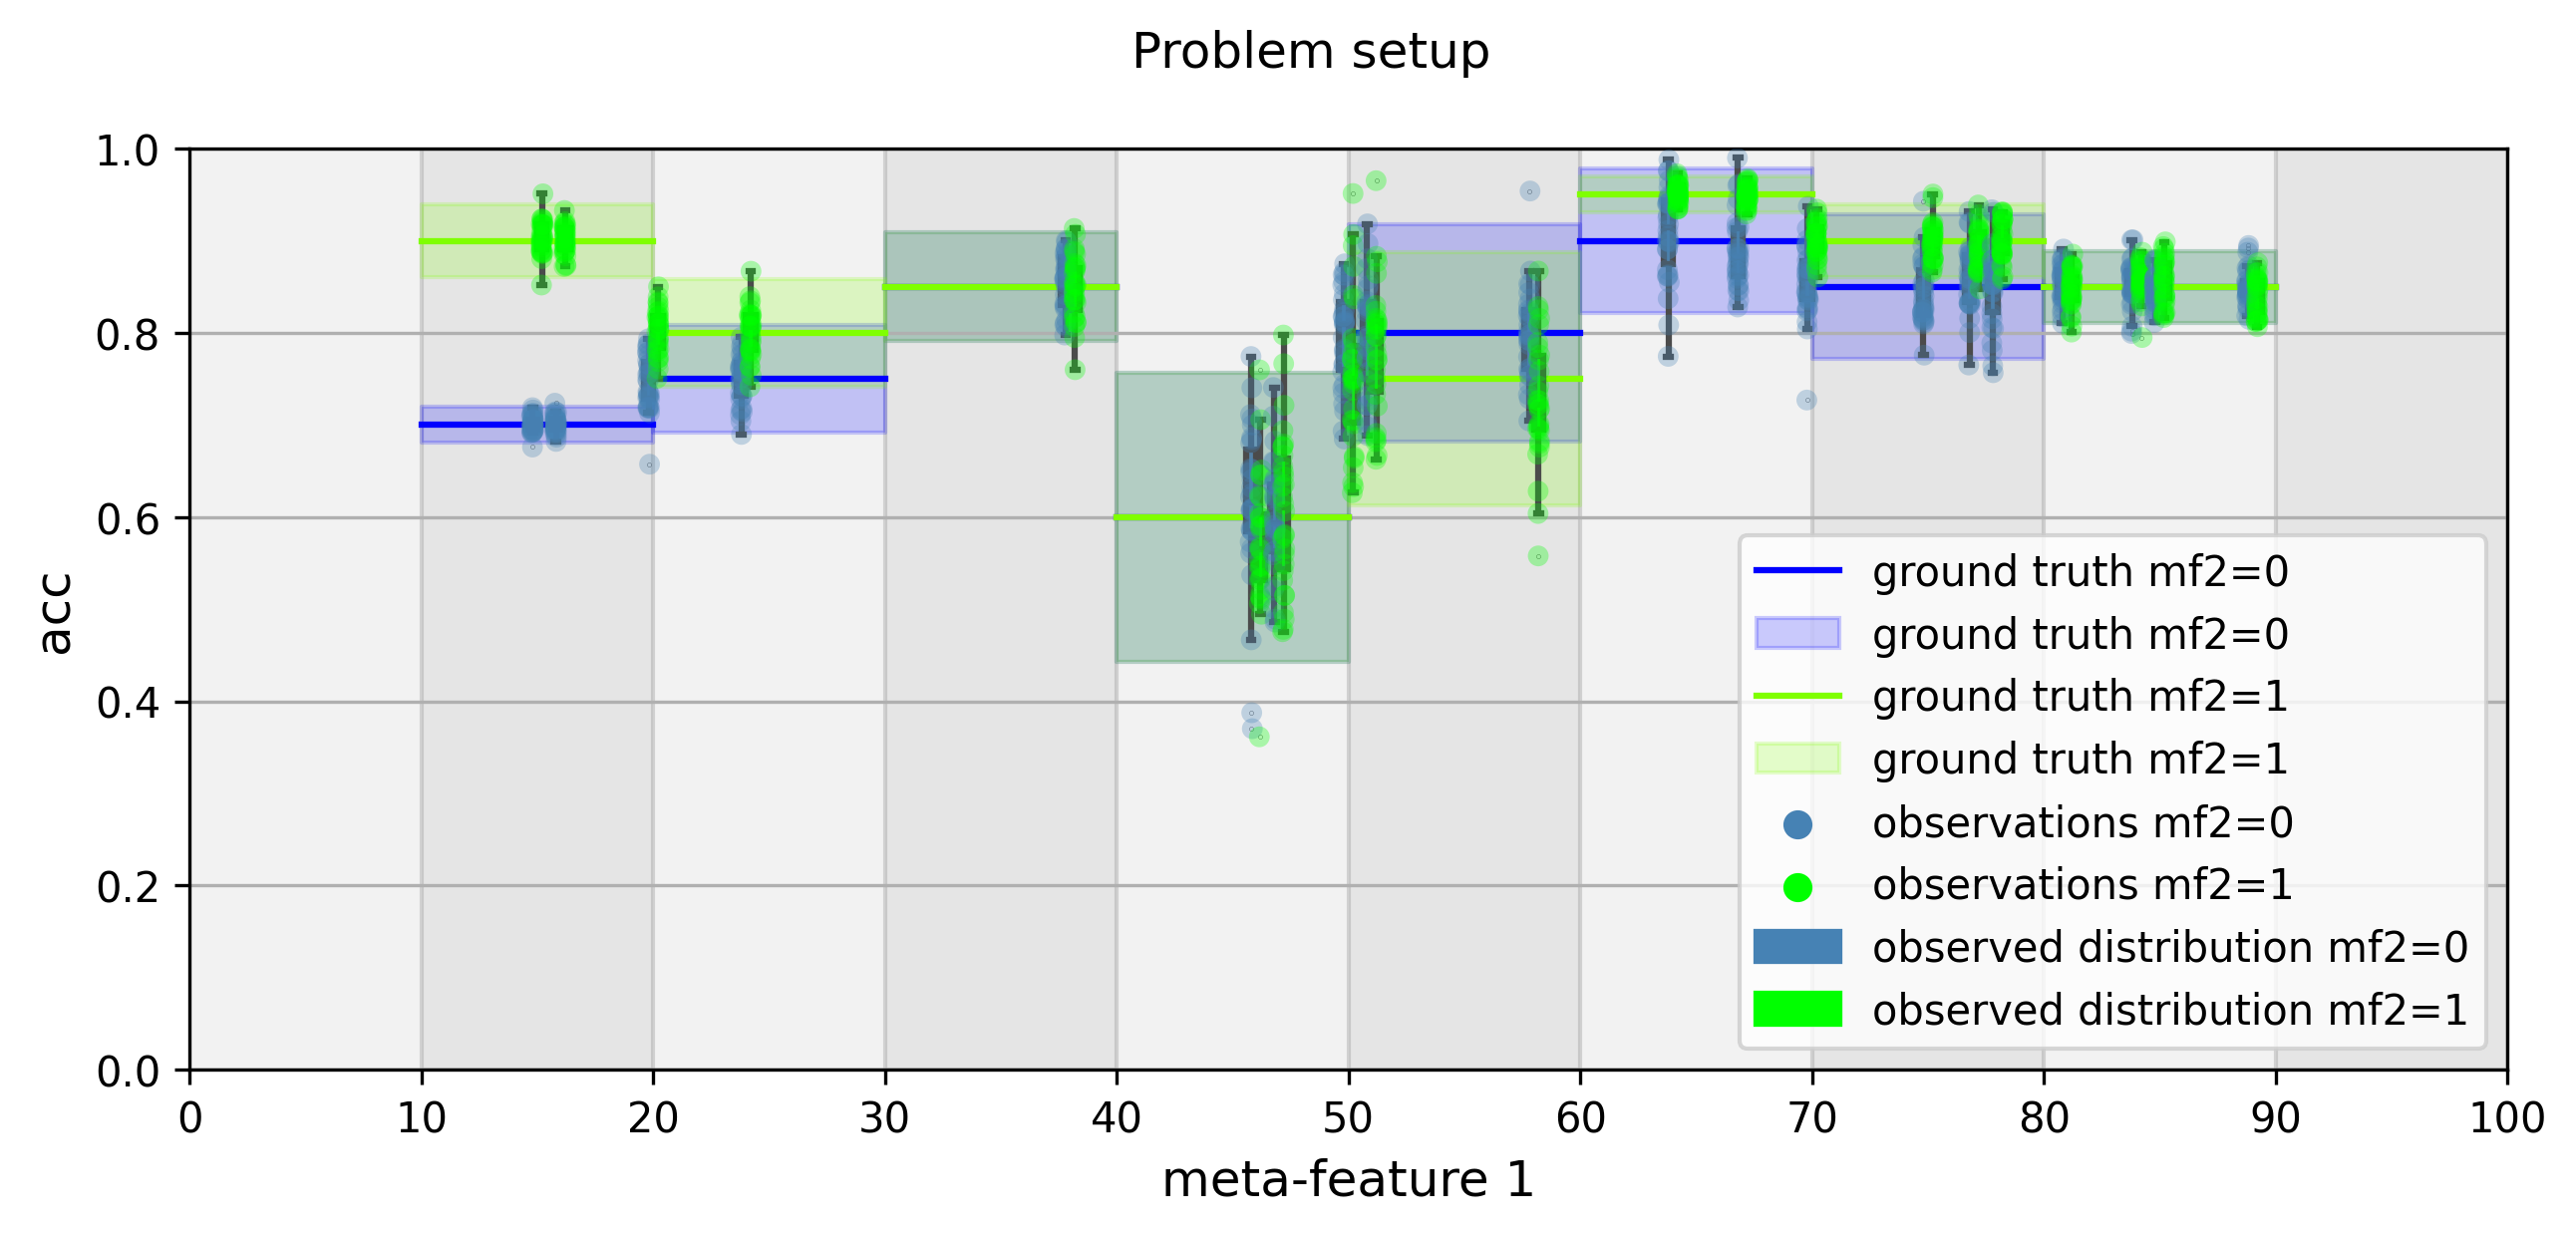

In [5]:
plot_data_1dim(x, y, x_agg_1dim, y_agg, x_test_1dim, title='Problem setup')

## RF on aggregated mean and variance

Trained on 1-dim training data set

In [6]:
#model and training
rf = RandomForestRegressor()
rf.fit(x_agg_2dim[:,0].reshape(-1,1), y_agg)

#predictions to calculate uncertainties
y_pred_mean_rf_help = np.empty([rf.n_estimators, x_test_1dim.shape[0]])
y_pred_var_rf_help = np.empty([rf.n_estimators, x_test_1dim.shape[0]])
for i in range(rf.n_estimators):
    y_pred_rf_help = rf.estimators_[i].predict(x_test_1dim.reshape(-1,1))
    y_pred_mean_rf_help[i] = y_pred_rf_help[:,0]
    y_pred_var_rf_help[i] = y_pred_rf_help[:,1]

#mean prediction
y_pred_mean_rf = np.mean(y_pred_mean_rf_help, axis=0)

#uncertainties (var)
aleatoric_uncertainty_rf = np.mean(y_pred_var_rf_help, axis=0)
epistemic_uncertainty_rf = np.var(y_pred_mean_rf_help, axis=0)
total_uncertainty_rf = aleatoric_uncertainty_rf + epistemic_uncertainty_rf

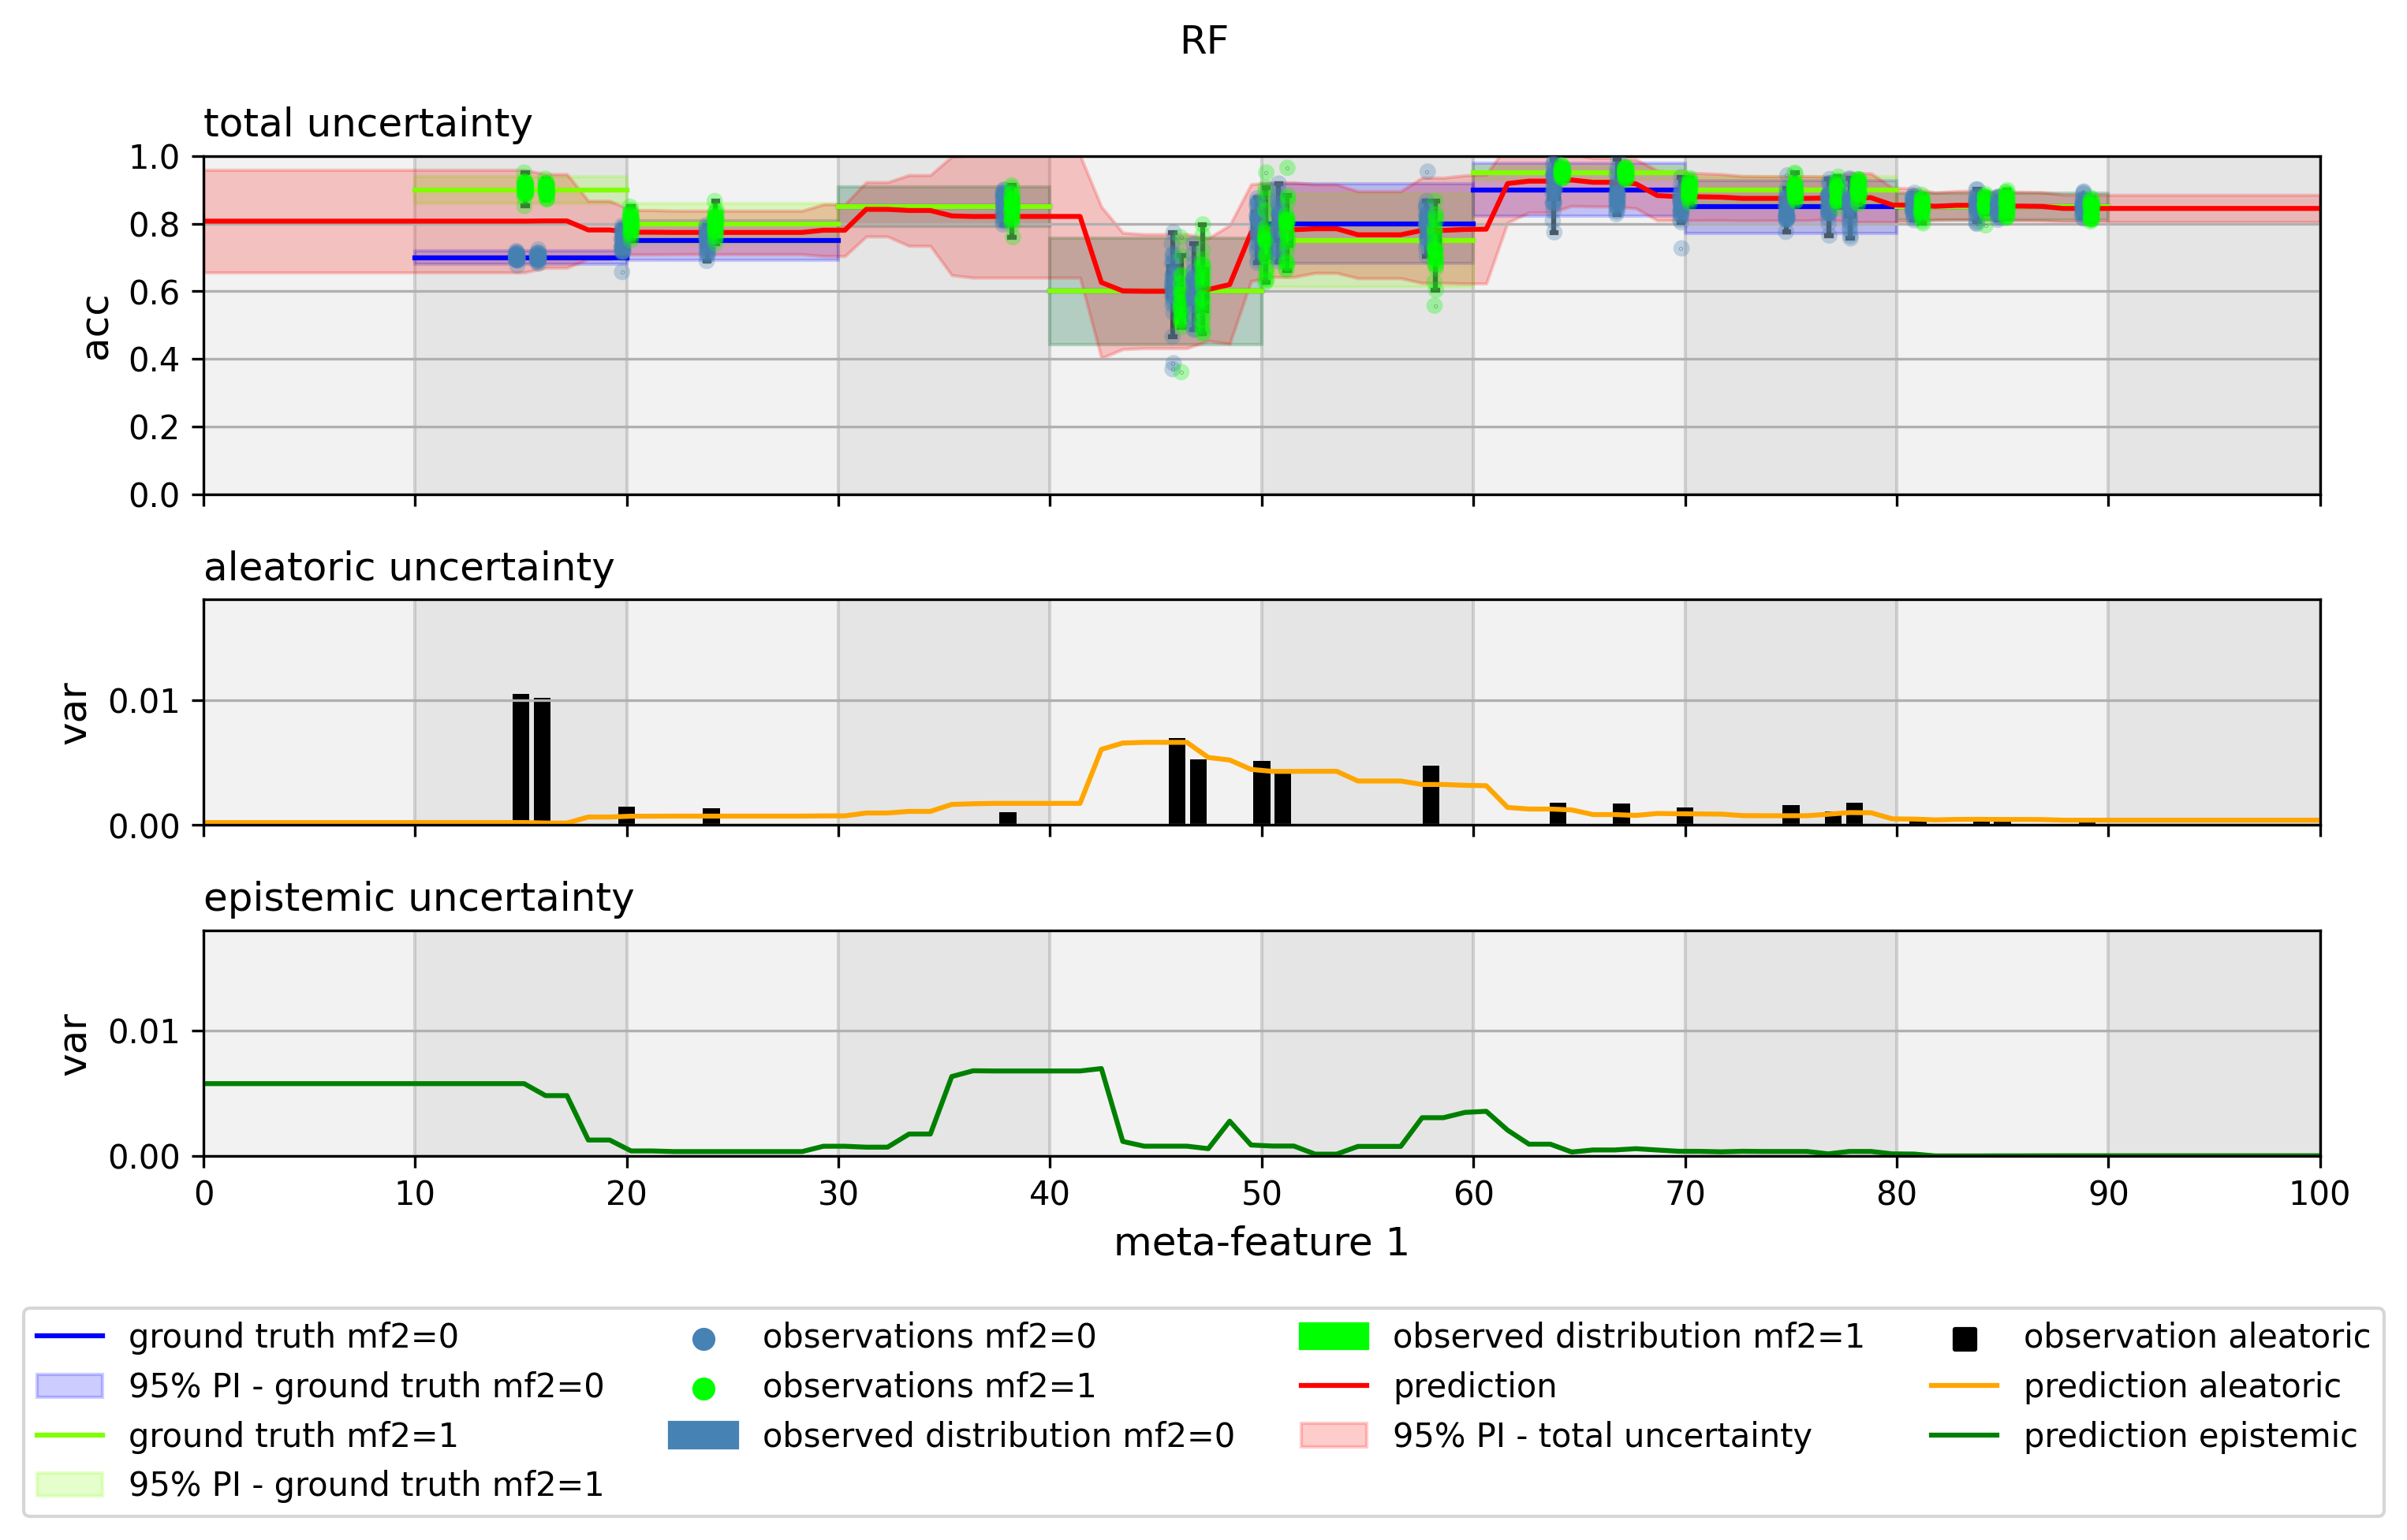

In [7]:
plot_data_1dim(x, y, x_agg_1dim, y_agg_1dim, x_test_1dim, y_pred_mean_rf, aleatoric_uncertainty_rf, epistemic_uncertainty_rf, total_uncertainty_rf, title='RF')

Trained on 2-dim training data set

In [8]:
#model and training
rf2 = RandomForestRegressor()
rf2.fit(x_agg_2dim, y_agg)

#predictions to calculate uncertainties
y_pred_mean_rf2_help = np.empty([rf2.n_estimators, x_test_2dim.shape[0]])
y_pred_var_rf2_help = np.empty([rf2.n_estimators, x_test_2dim.shape[0]])
for i in range(rf2.n_estimators):
    y_pred_rf2_help = rf2.estimators_[i].predict(x_test_2dim)
    y_pred_mean_rf2_help[i] = y_pred_rf2_help[:,0]
    y_pred_var_rf2_help[i] = y_pred_rf2_help[:,1]

#mean prediction
y_pred_mean_rf2 = np.mean(y_pred_mean_rf2_help, axis=0)

#uncertainties (var)
aleatoric_uncertainty_rf2 = np.mean(y_pred_var_rf2_help, axis=0)
epistemic_uncertainty_rf2 = np.var(y_pred_mean_rf2_help, axis=0)
total_uncertainty_rf2 = aleatoric_uncertainty_rf2 + epistemic_uncertainty_rf2

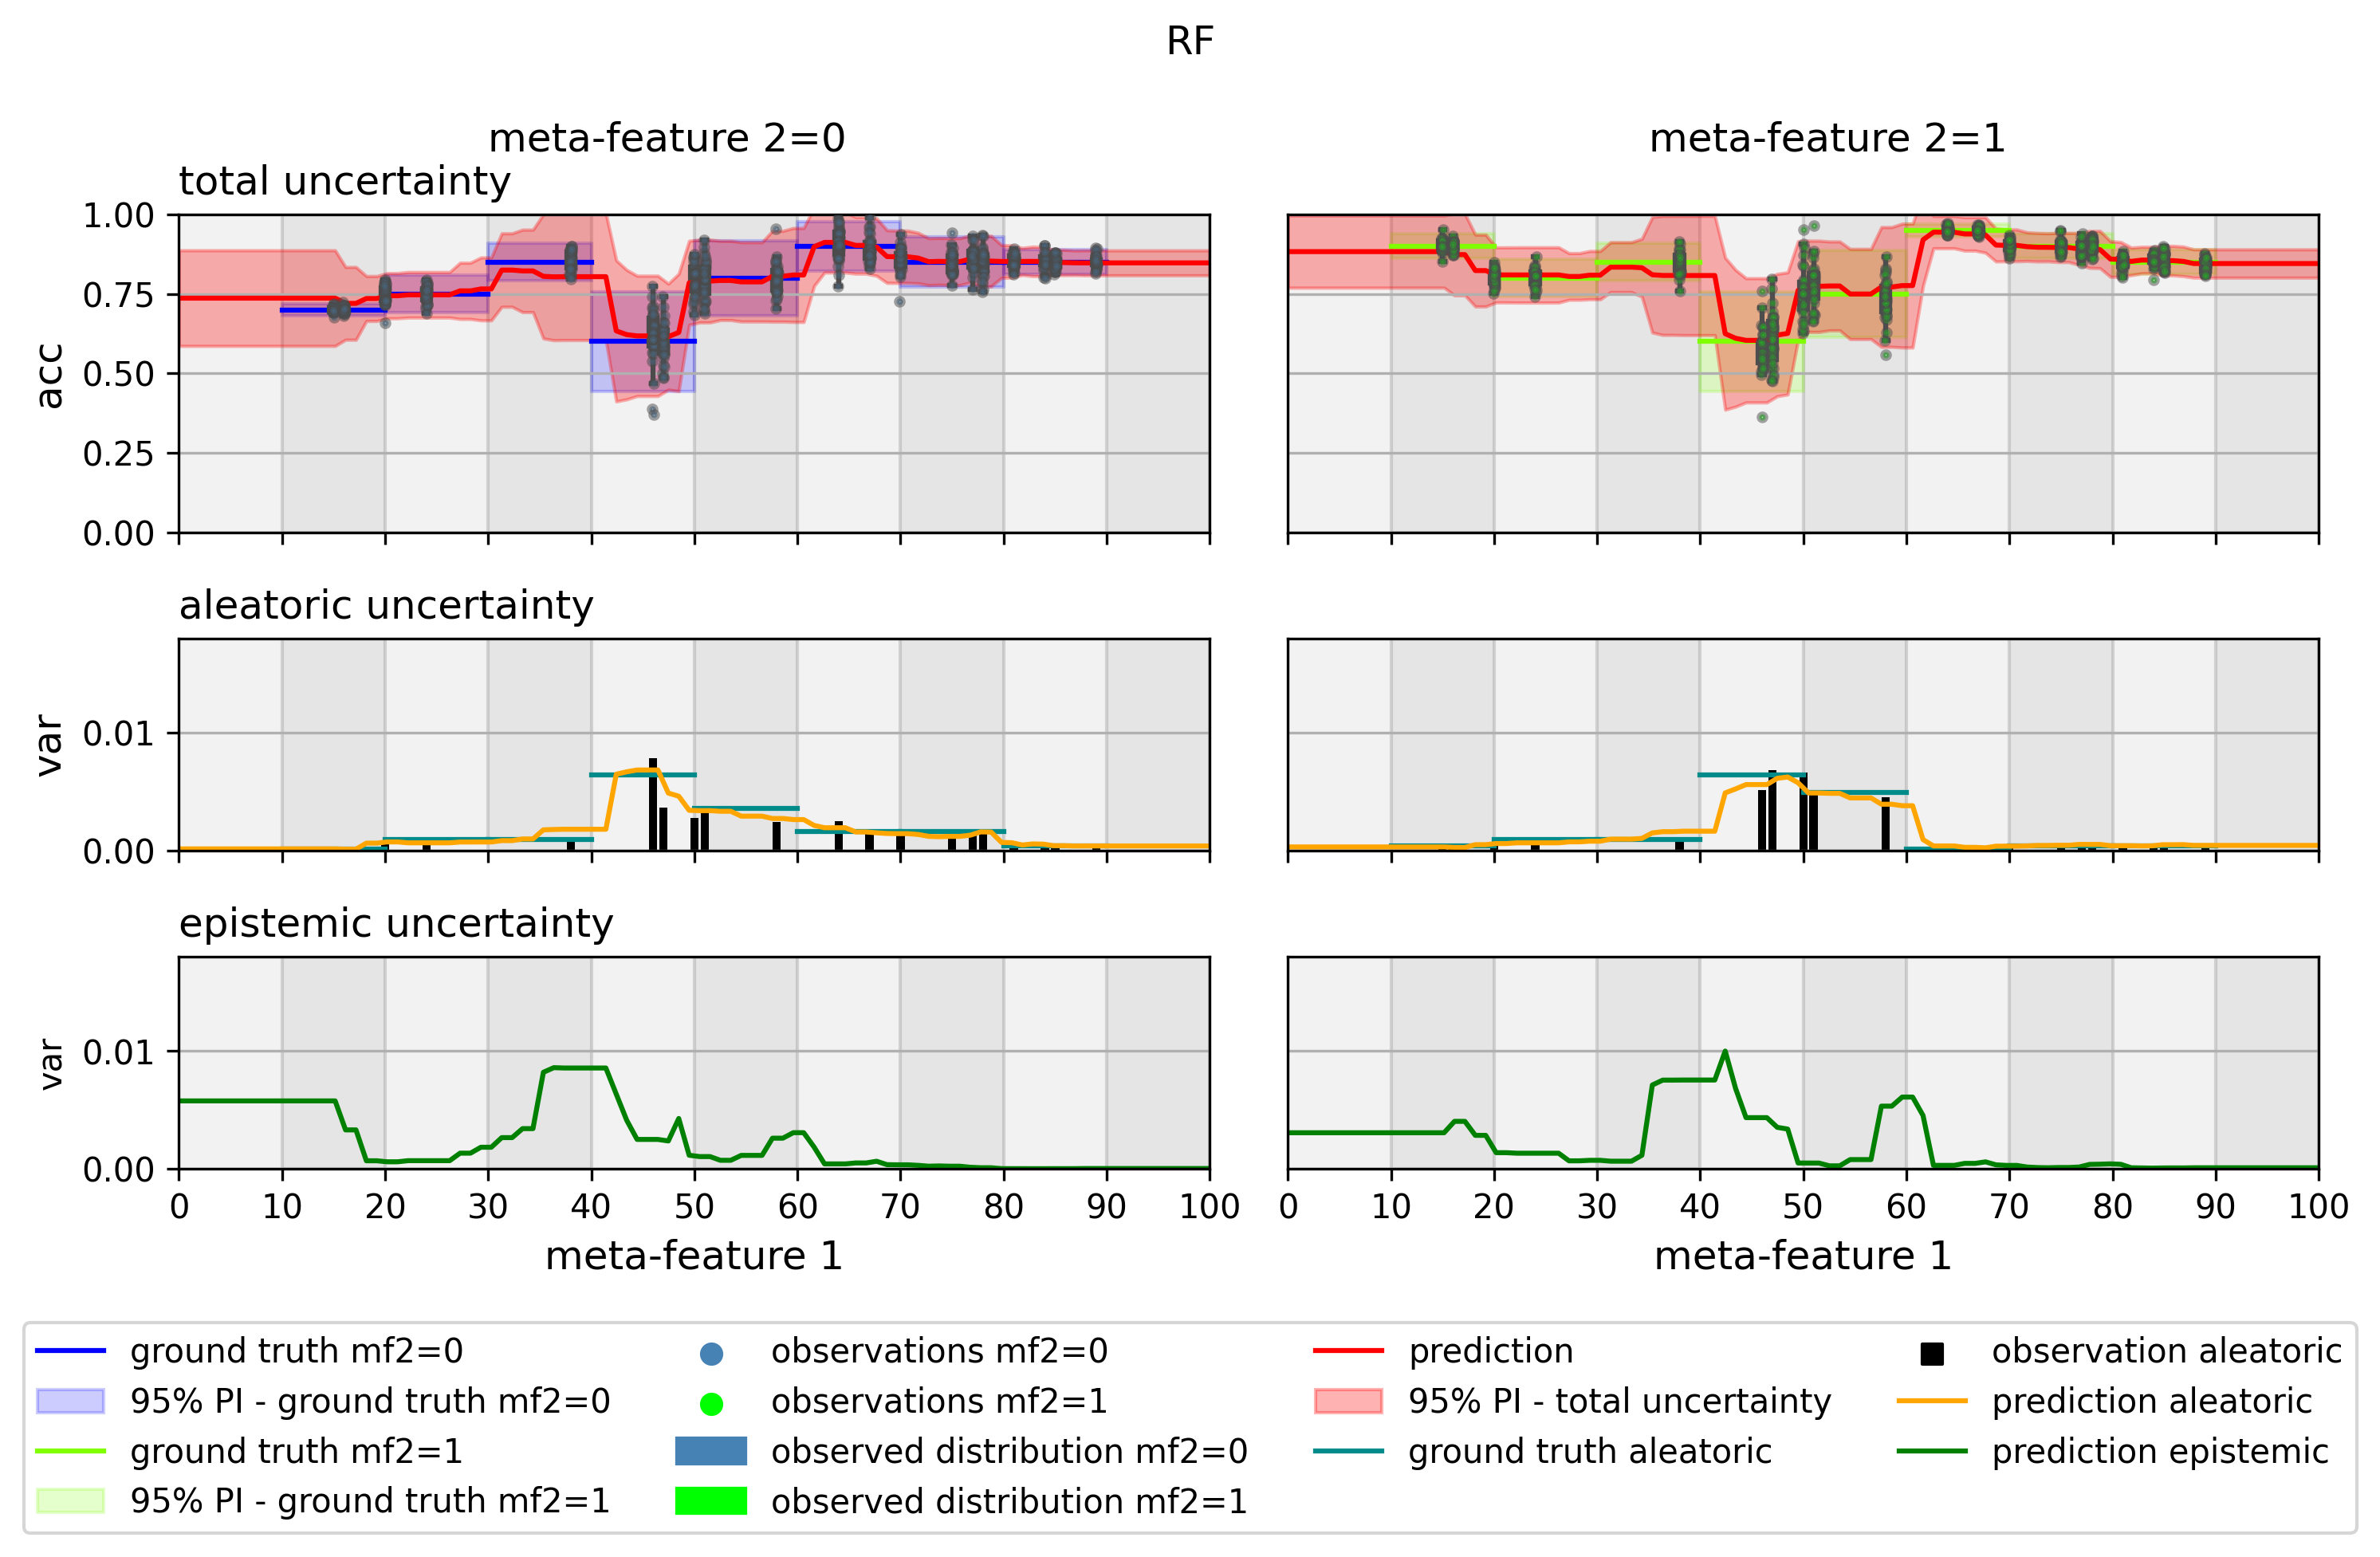

In [9]:
plot_data_2dim(x, y, x_agg_1dim, y_agg, x_test_1dim, y_pred_mean_rf2, aleatoric_uncertainty_rf2, epistemic_uncertainty_rf2, total_uncertainty_rf2, title='RF')

## vSGLB

Trained on 1-dim training data set

In [10]:
#model and training
cbr = CatBoostRegressor(loss_function='RMSEWithUncertainty', verbose=False,
                                        bootstrap_type='Bernoulli', custom_metric='RMSE',
                                        posterior_sampling=True, n_estimators=100, random_seed=i)
cbr.fit(x[:,0].reshape(-1,1), y)

#predictions to calculate uncertainties
pred_cbr_help = cbr.virtual_ensembles_predict(x_test_1dim.reshape(-1,1), virtual_ensembles_count=10, prediction_type='TotalUncertainty')

#mean prediction
y_pred_mean_cbr = pred_cbr_help[:,0] 

#uncertainties
epistemic_uncertainty_cbr = pred_cbr_help[:,1]
aleatoric_uncertainty_cbr = pred_cbr_help[:,2]
total_uncertainty_cbr = epistemic_uncertainty_cbr + aleatoric_uncertainty_cbr

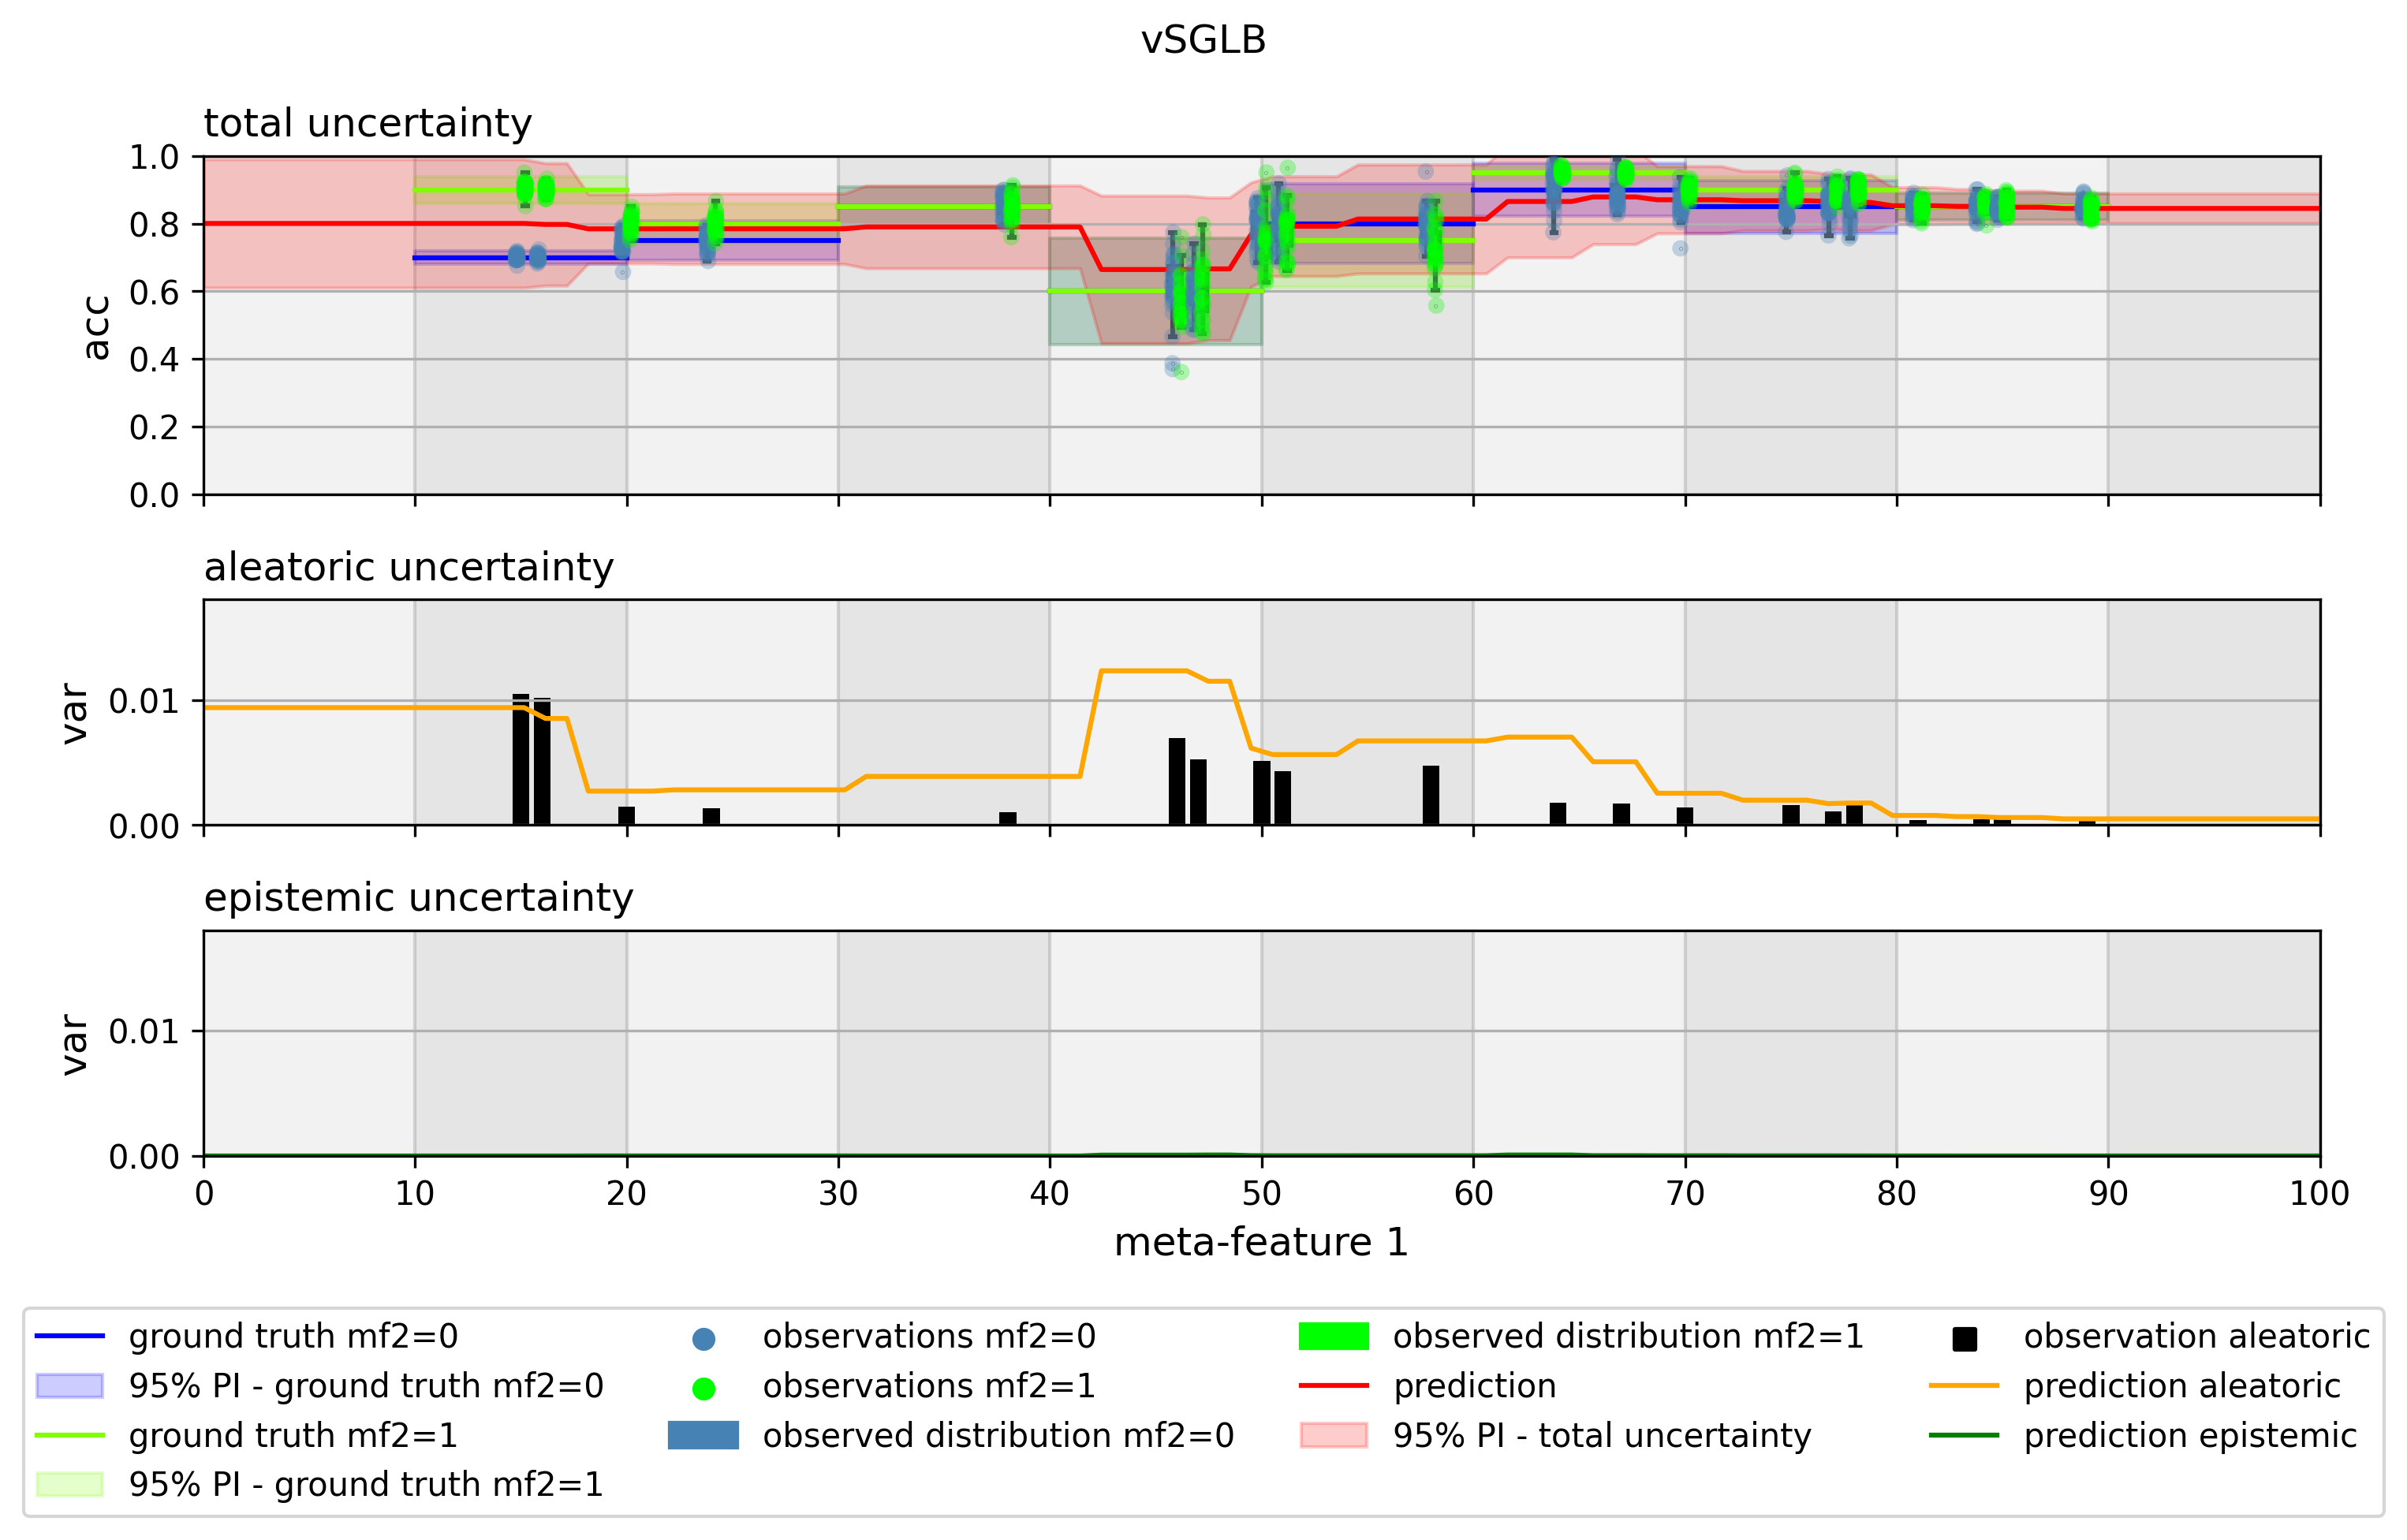

In [11]:
plot_data_1dim(x, y, x_agg_1dim, y_agg_1dim, x_test_1dim, y_pred_mean_cbr, aleatoric_uncertainty_cbr, epistemic_uncertainty_cbr, total_uncertainty_cbr, title='vSGLB')

Trained on 2-dim training data set

In [12]:
#model and training
cbr2 = CatBoostRegressor(loss_function='RMSEWithUncertainty', verbose=False,
                                        bootstrap_type='Bernoulli', custom_metric='RMSE',
                                        posterior_sampling=True, n_estimators=1000, random_seed=i)
cbr2.fit(x, y)

#predictions to calculate uncertainties
pred_cbr2_help = cbr2.virtual_ensembles_predict(x_test_2dim, virtual_ensembles_count=100, prediction_type='TotalUncertainty')

#mean prediction
y_pred_mean_cbr2 = pred_cbr2_help[:,0] 

#uncertainties
epistemic_uncertainty_cbr2 = pred_cbr2_help[:,1]
aleatoric_uncertainty_cbr2 = pred_cbr2_help[:,2]
total_uncertainty_cbr2 = epistemic_uncertainty_cbr2 + aleatoric_uncertainty_cbr2

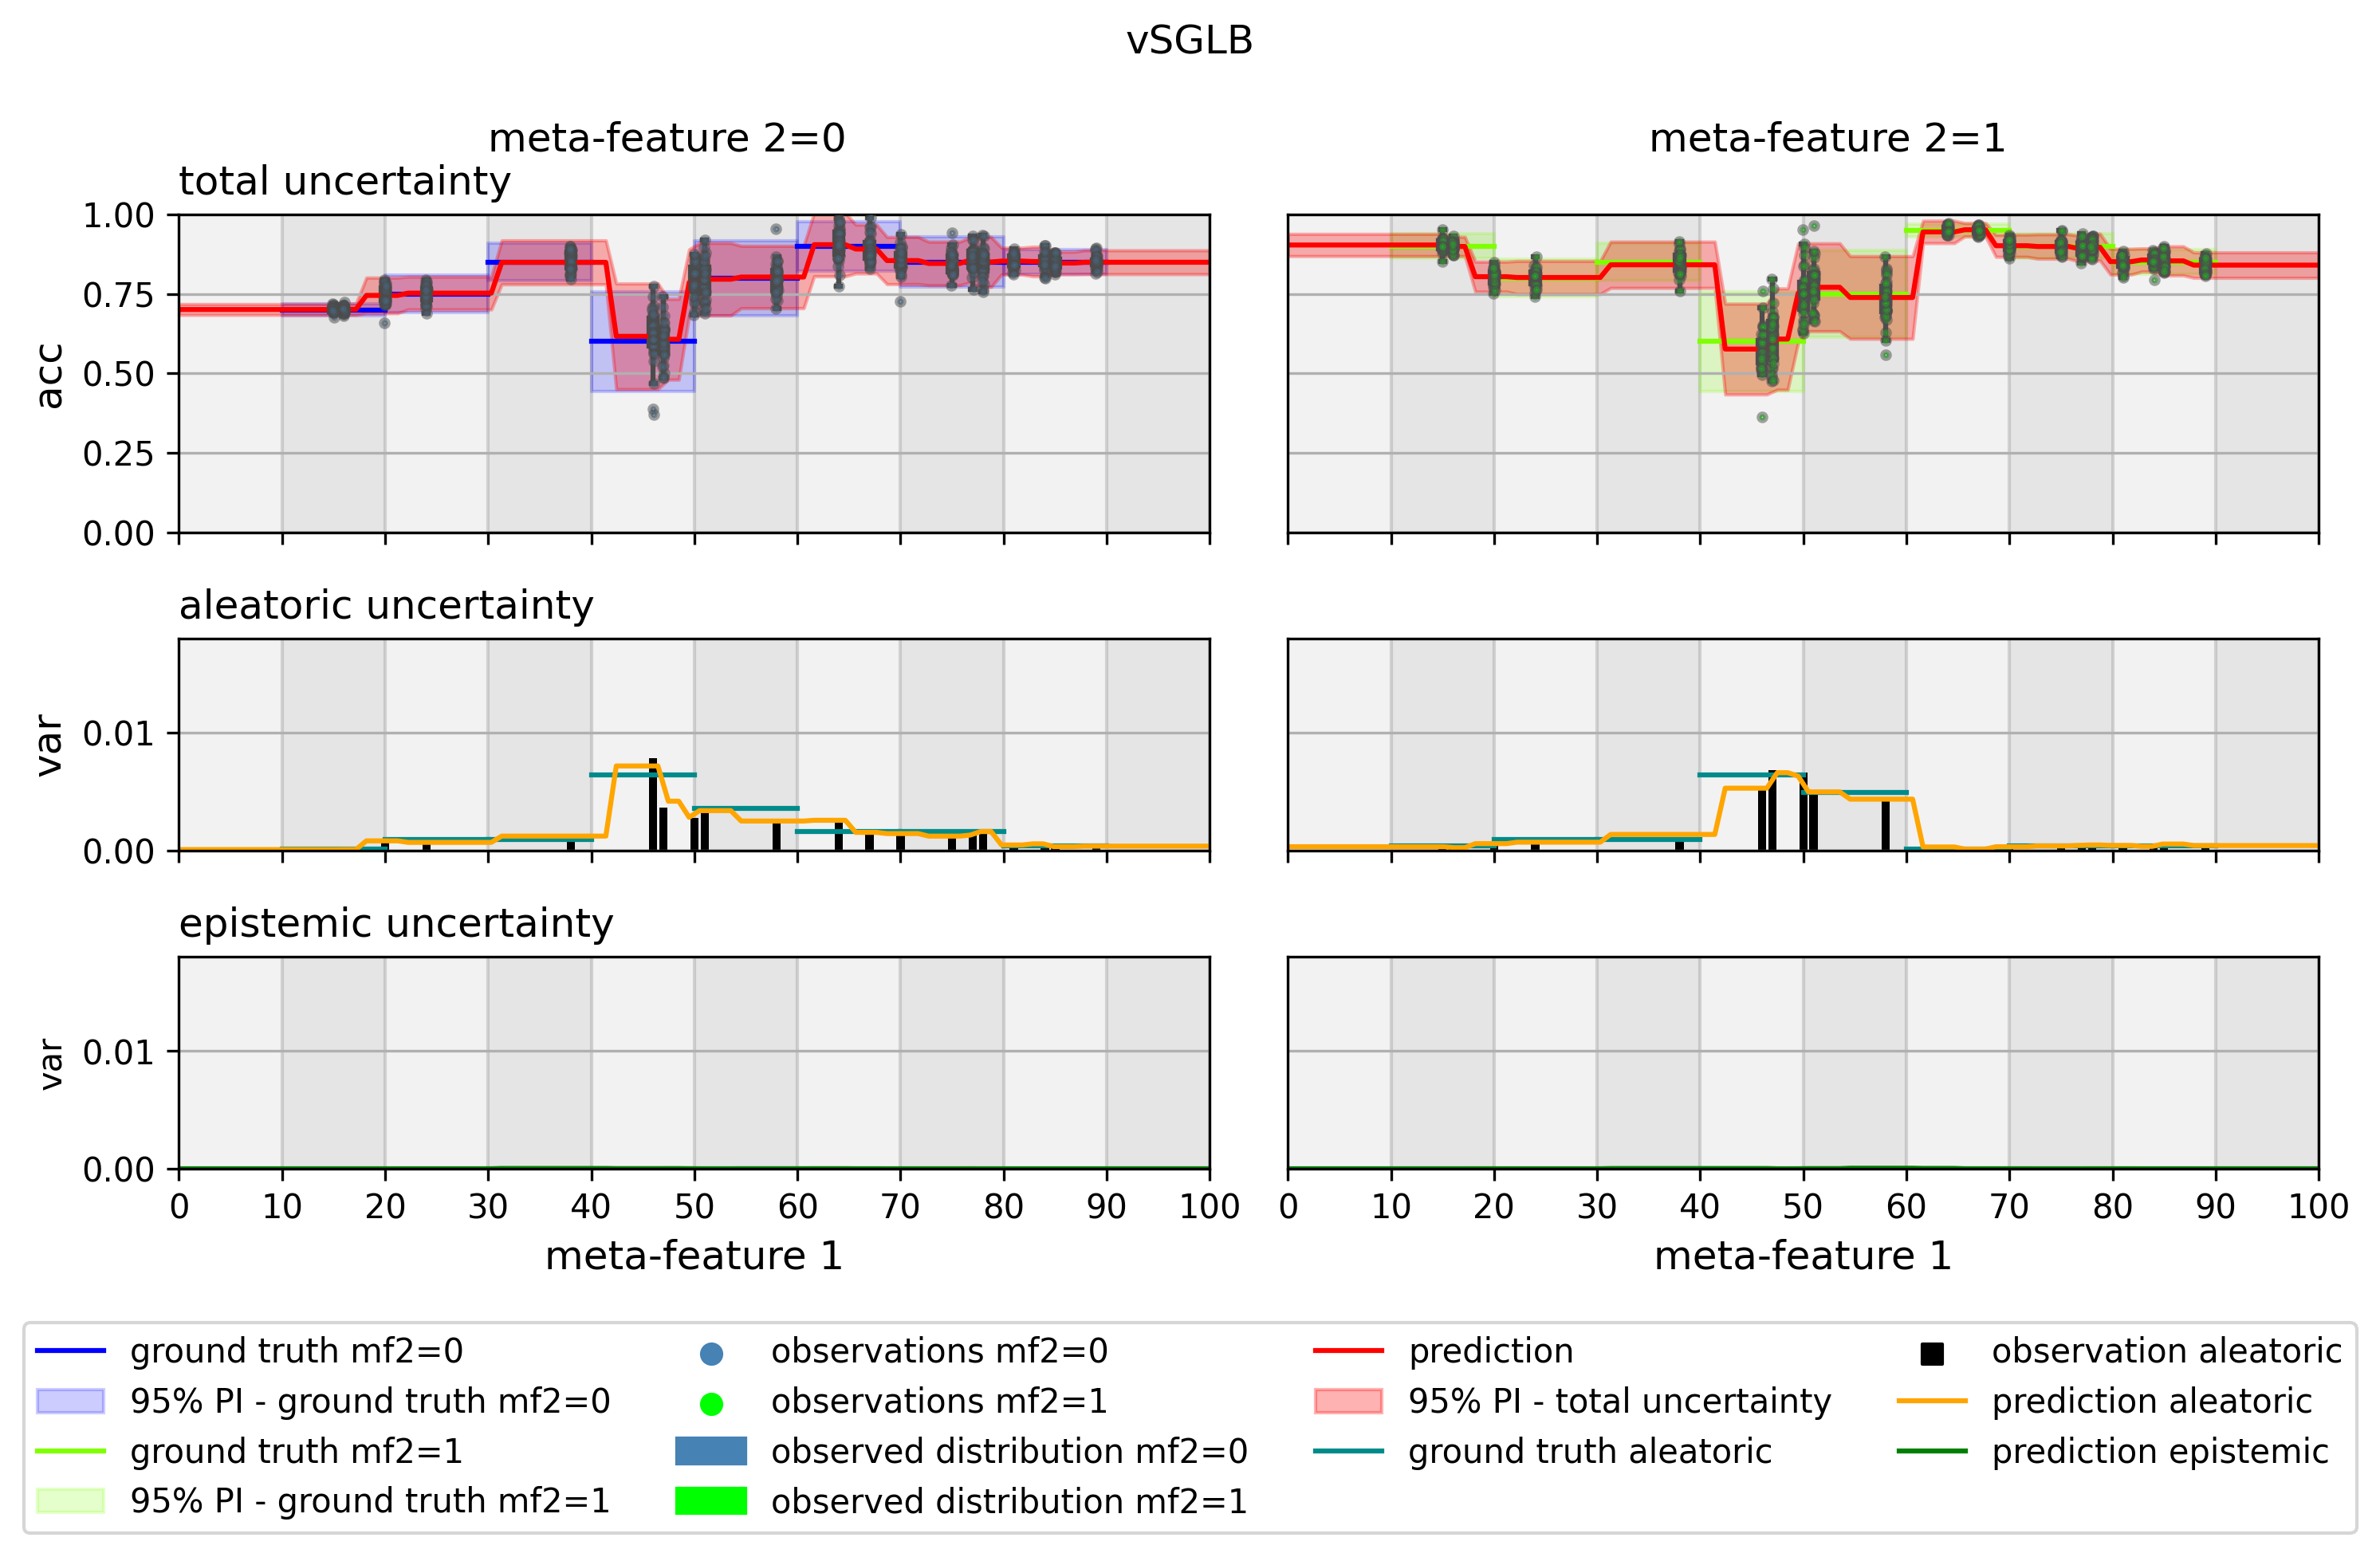

In [13]:
plot_data_2dim(x, y, x_agg_1dim, y_agg, x_test_1dim, y_pred_mean_cbr2, aleatoric_uncertainty_cbr2, epistemic_uncertainty_cbr2, total_uncertainty_cbr2, title='vSGLB')

## GPR on aggregated mean and variance

Trained on 1-dim training data set

In [14]:
#model and training
gpr_mean = GaussianProcessRegressor(Matern(), n_restarts_optimizer=10, normalize_y=True, alpha=y_agg[:,1])
gpr_var = GaussianProcessRegressor()
gpr_mean.fit(x_agg_2dim[:,0].reshape(-1,1), y_agg[:,0])
gpr_var.fit(x_agg_2dim[:,0].reshape(-1,1), y_agg[:,1])

#predictions to calculate uncertainties
y_pred_mean_gpr, y_pred_epistemic_gpr = gpr_mean.predict(x_test_1dim.reshape(-1,1), return_std=True)
y_pred_var_gpr = gpr_var.predict(x_test_1dim.reshape(-1,1), return_std=False)

#mean prediction
y_pred_mean_gpr = y_pred_mean_gpr

#uncertainties
epistemic_uncertainty_gpr = y_pred_epistemic_gpr**2
aleatoric_uncertainty_gpr = y_pred_var_gpr
total_uncertainty_gpr = epistemic_uncertainty_gpr + aleatoric_uncertainty_gpr

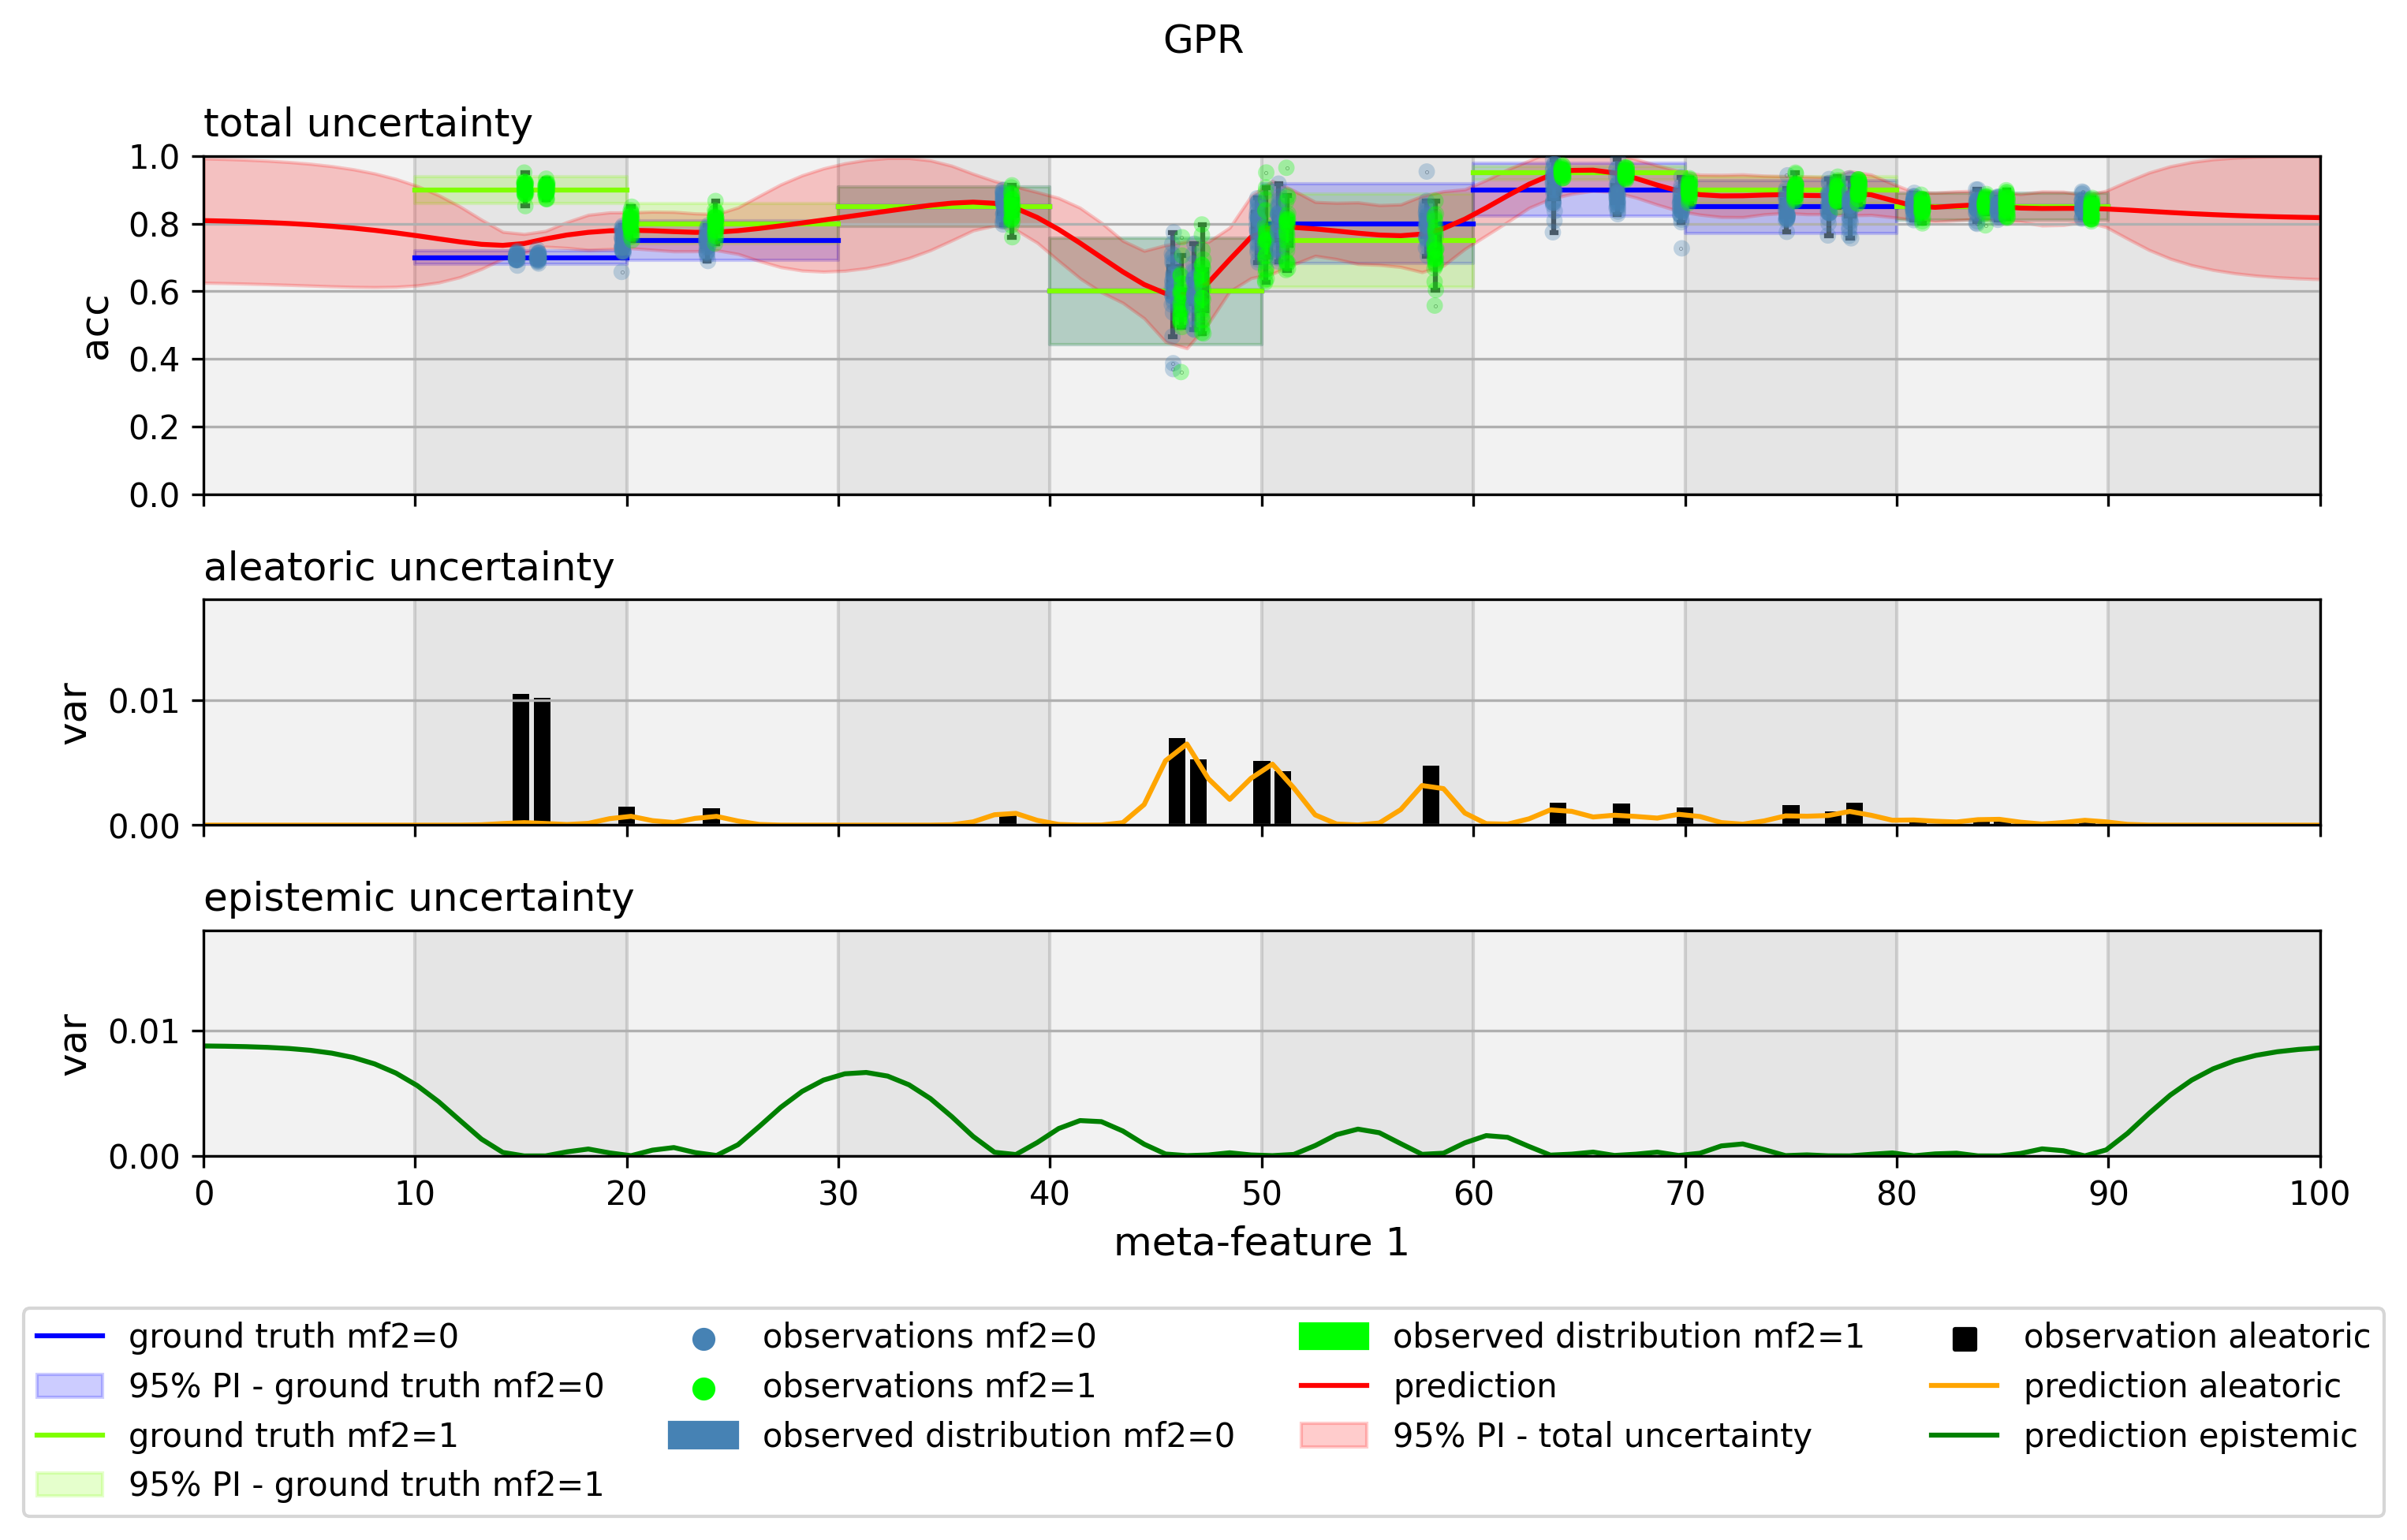

In [15]:
plot_data_1dim(x, y, x_agg_1dim, y_agg_1dim, x_test_1dim, y_pred_mean_gpr, aleatoric_uncertainty_gpr, epistemic_uncertainty_gpr, total_uncertainty_gpr, title='GPR')

Trained on 2-dim training data set

In [16]:
#model and training
gpr_mean2 = GaussianProcessRegressor(Matern(), n_restarts_optimizer=10, normalize_y=True, alpha=y_agg[:,1])
gpr_var2 = GaussianProcessRegressor()
gpr_mean2.fit(x_agg_2dim, y_agg[:,0])
gpr_var2.fit(x_agg_2dim, y_agg[:,1])

#predictions to calculate uncertainties
y_pred_mean_gpr2, y_pred_epistemic_gpr2 = gpr_mean2.predict(x_test_2dim, return_std=True)
y_pred_var_gpr2 = gpr_var2.predict(x_test_2dim, return_std=False)

#mean prediction
y_pred_mean_gpr2 = y_pred_mean_gpr2

#uncertainties
epistemic_uncertainty_gpr2 = y_pred_epistemic_gpr2**2
aleatoric_uncertainty_gpr2 = y_pred_var_gpr2
total_uncertainty_gpr2 = epistemic_uncertainty_gpr2 + aleatoric_uncertainty_gpr2

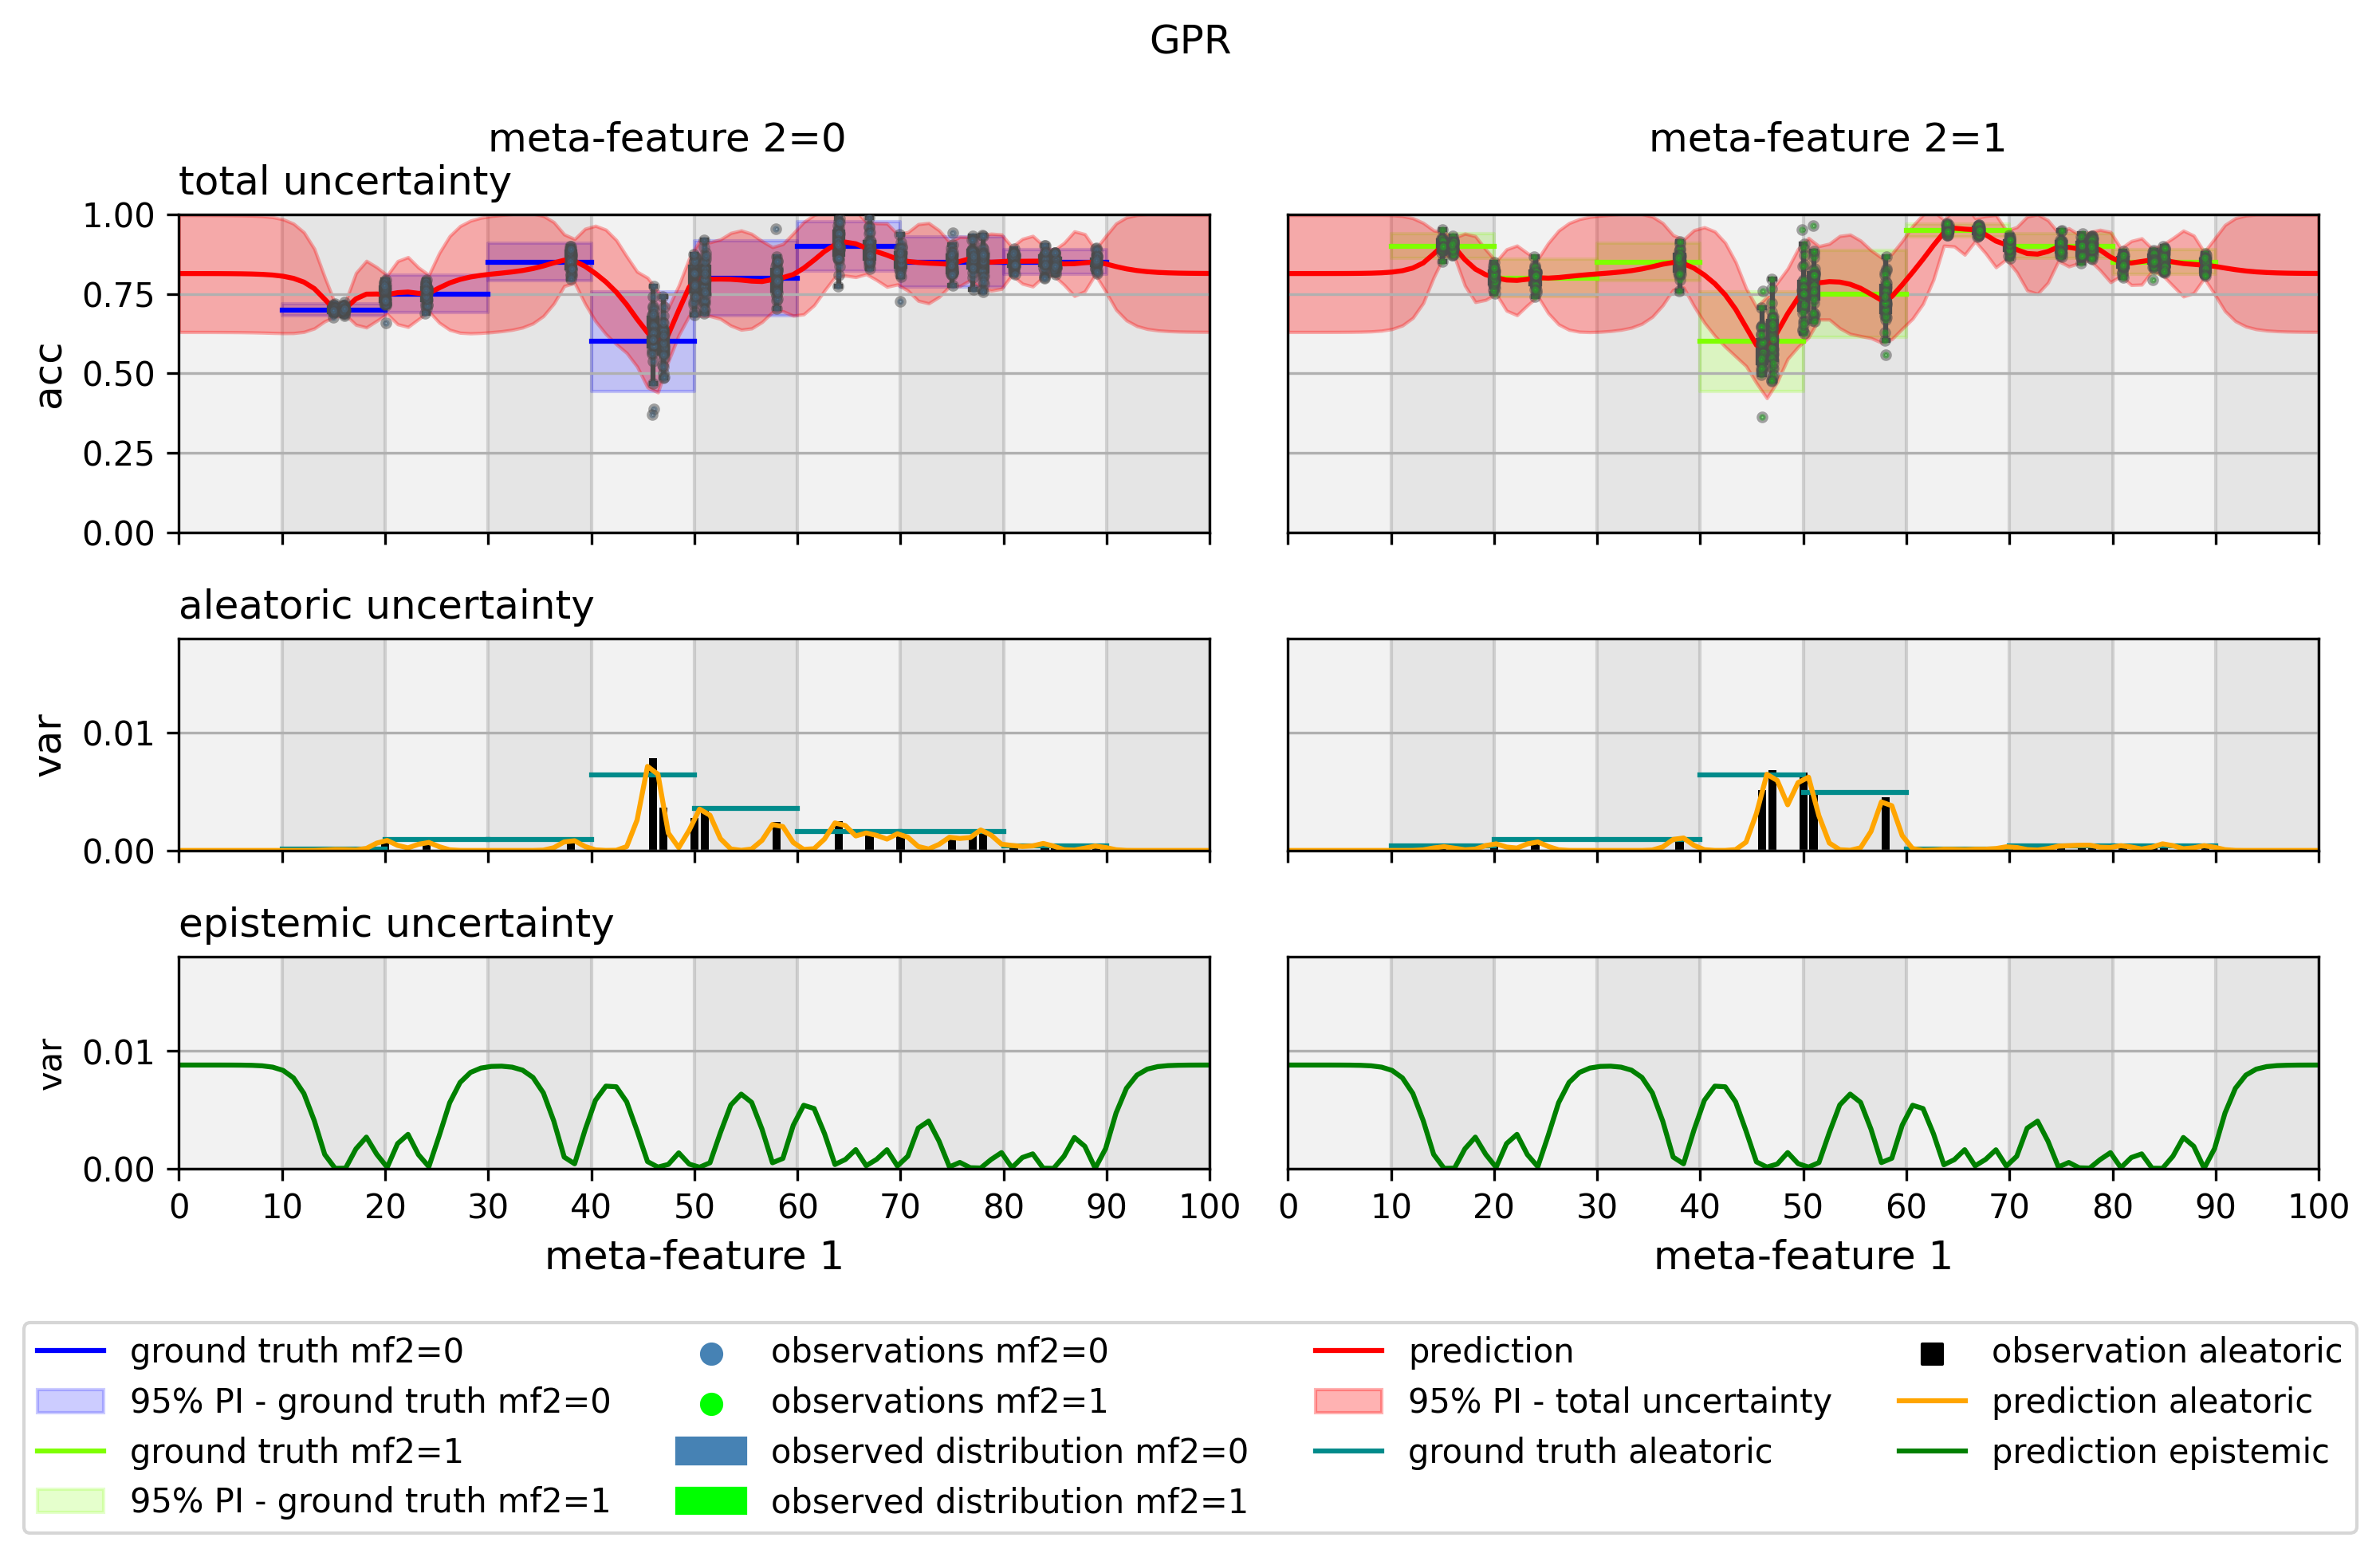

In [17]:
plot_data_2dim(x, y, x_agg_1dim, y_agg, x_test_1dim, y_pred_mean_gpr2, aleatoric_uncertainty_gpr2, epistemic_uncertainty_gpr2, total_uncertainty_gpr2, title='GPR')